In [1]:


# load dataframes and with their corresponding LaserField objects
%load_ext autoreload
import pandas as pd
import numpy as np
import pickle
from model import model_unified, add_pulses
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
SFA_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/SFA_P_fit_data.pkl')

# load models
with open('GASFIR/Data/WithFit/SFA_P_Fit_model.pkl', 'rb') as f:
        SFA_out = pickle.load(f)
        SFA_params = SFA_out.params.valuesdict()
        SFA_params['e2']=0
        SFA_params['t3']=0
        SFA_params['t4']=1
        print(SFA_params)
with open('GASFIR/Data/WithFit/tRecX_P_Fit_model.pkl', 'rb') as f:
        tRecX_out = pickle.load(f)
        tRecX_params = tRecX_out.params.valuesdict()
        tRecX_params['e2']=0
        tRecX_params['t3']=0
        tRecX_params['t4']=1
with open('GASFIR/Data/WithFit/tRecX_P_QSnA_Fit_model.pkl', 'rb') as f:
        out = pickle.load(f)
        tRecX_nA_QS_params=out.params.valuesdict()
        tRecX_nA_QS_params['e2']=0
        tRecX_nA_QS_params['t3']=0
        tRecX_nA_QS_params['t4']=1
with open('GASFIR/Data/WithFit/SiO2_P_Fit_model.pkl', 'rb') as f:     
        SiO2_out = pickle.load(f)
        SiO2_params = SiO2_out.params.valuesdict()
        print(SiO2_params)

def set_size(width_pt, fraction=1., subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def sci_notation_base_power(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return (a,b)

{'E_g': 0.5, 'αPol': 4.51, 'tau': 2.849306230484045, 'e1': 2.2807090369952894, 't0': 0.1, 't1': 3.043736601676354, 't2': 7.270940402611973, 'e2': 0, 't3': 0, 't4': 1}
{'E_g': 0.3234049184956266, 'αPol': 1.2291264322774376, 'tau': 19.690969521302318, 'e1': 1, 'e2': 3.1191153780903567, 't0': 4.162714246636057e-05, 't1': 0.23337095847860923, 't2': 0.46951547002424654}


## 1st Figure

params has no valuesdict method
assuming it is already a dictionary
params has no valuesdict method
assuming it is already a dictionary
params has no valuesdict method
assuming it is already a dictionary
params has no valuesdict method
assuming it is already a dictionary


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


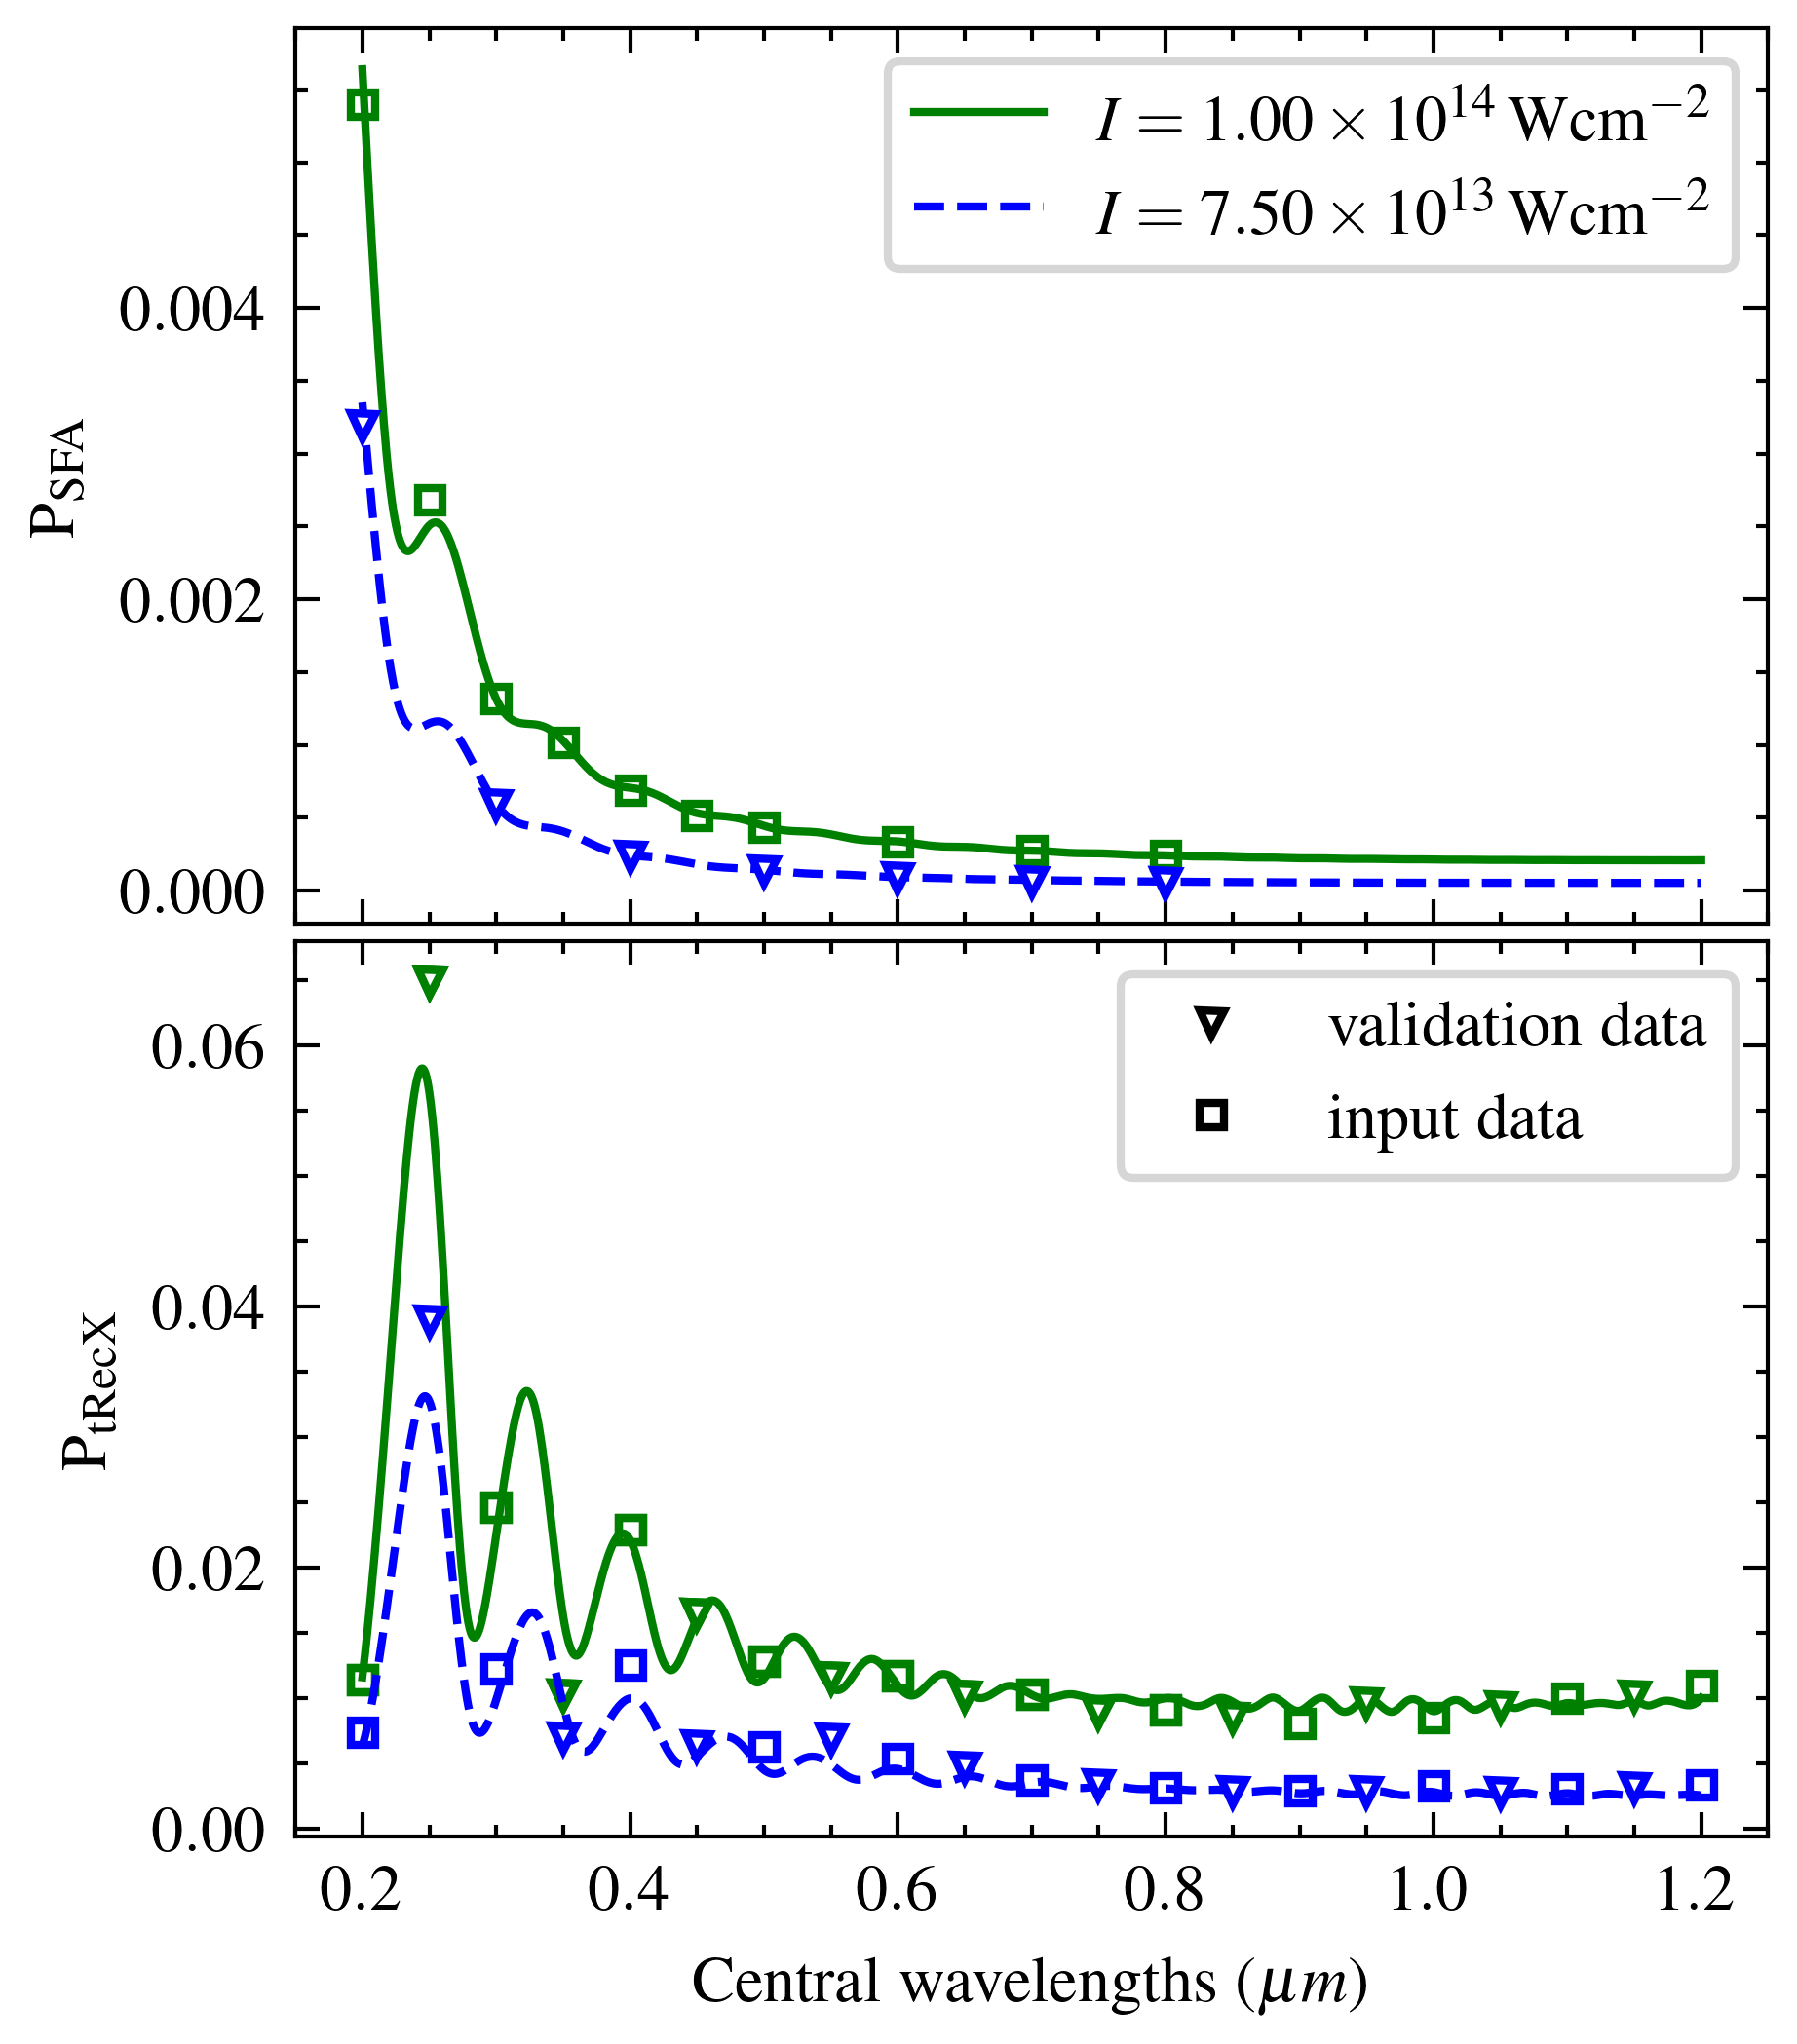

<Figure size 1980x1500 with 0 Axes>

In [13]:
%autoreload
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import make_interp_spline
#import matplotlib as mpl# Use the pgf backend (must be set before pyplot imported)
# mpl.use('pgf')
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex"
# })
plt.style.use(['science', 'ieee'])

# Create subplots
fig, axs = plt.subplots(2, 1, sharex=True, figsize=set_size(469.755, fraction=0.5, subplots=(2, 1)))
fig.subplots_adjust(hspace=0.02)
axs[1].set_xlabel(r'Central wavelengths ($\mu m$)')
axs[0].set_ylabel(r'$\mathrm{P_{SFA}}$')
axs[1].set_ylabel(r'$\mathrm{P_{tRecX}}$')

# Function to plot data
def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    # data = data[data.wavel>=300]
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), color=color, label=rf'$I = {a}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')#, '-'
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%50==0]
    #color="black"
    ax.plot(data.wavel/1000, data.Y, "v", color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 's', markerfacecolor='none', color=color, markersize=3)#, label=f'{label_prefix} used for fit'

# Plot for SFA_fitted_data with different intensities
SFA_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/SFA_P_fit_data.pkl')
for intensity, color in [(1e14, 'green'), (0.75e14, 'blue')]: #, (1.25e14, 'red')
    data = SFA_fitted_data[(SFA_fitted_data.intens == intensity) & (SFA_fitted_data.FWHM_OC == 1) & (SFA_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs[0], data, color, sci_notation_base_power(intensity), params=SFA_params)

# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1e14, 'green'),  (0.8e14, 'blue')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs[1], data, color, sci_notation_base_power(intensity), params=tRecX_params)
    
# Add legends
axs[0].legend(fancybox=True, frameon=True)#handlelength=0, handletextpad=1,
axs[1].legend(handles=[plt.Line2D([], [], marker='v', color='black', markerfacecolor='none', markersize=3, linestyle='None', label='validation data'),
                      plt.Line2D([], [], marker='s', color='black', markerfacecolor='none', markersize=3, linestyle='None', label='input data')], 
               fancybox=True, frameon=True)#handlelength=0, handletextpad=1,

# Show plot
plt.savefig("GASFIR/images/fig1.eps", format="eps", bbox_inches="tight")
plt.savefig("GASFIR/images/fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.savefig("GASFIR/images/fig1.pgf", format="pgf")


## 2nd Figure altenative


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


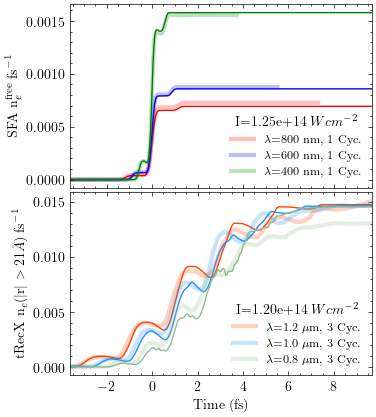

In [23]:
%autoreload
import matplotlib.pyplot as plt
import json
import scienceplots
from scipy.interpolate import make_smoothing_spline, make_interp_spline
from __init__ import AtomicUnits as AU
plt.style.use(['science'])
from scipy.integrate import solve_ivp
from __init__ import dr_dt_3D, Z_birth, jacobian

E_probe=lambda t: 0
E_probe=np.vectorize(E_probe)
beta=2
y_b=0
v_y=0.35
coul_fact=1

def get_data_point(data, wave_length, intensity, FWHM_OC, cep):
    return data[(data.wavel == wave_length) & (data.intens == intensity) & (data.FWHM_OC == FWHM_OC) & np.isclose(data.cep ,cep)]#.iloc[-1]#.to_dict()
# import tRecX data with rates 
SFA_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/SFA_P_fit_data.pkl')
SFA_fitted_data["rate"]=SFA_fitted_data.apply(lambda x: np.cumsum(x.rate), axis=1)
tRecX_rate_data=pd.read_csv('GASFIR/Data/Unprocessed/tRecX_data_with_rate.csv')
tRecX_rate_data["pulses"] = tRecX_rate_data.apply(lambda dat: add_pulses(dat), axis=1)
tRecX_rate_data["t"]=tRecX_rate_data.apply(lambda x: json.loads(x.t), axis=1)
# tRecX_rate_data["rate"]=tRecX_rate_data.apply(lambda x: np.diff(json.loads(x.rate), prepend=0), axis=1)
tRecX_rate_data["rate"]=tRecX_rate_data.apply(lambda x: json.loads(x.rate), axis=1)

# tRecX_rate = get_data_point(tRecX_rate_data, wave_length, intensity, FWHM_OC, cep)
# rate_fit= model_unified(tRecX_params, tRecX_rate)
# tRecX_rate= tRecX_rate.iloc[0]
# plt.plot(tRecX_rate["t"], tRecX_rate["rate"], label='Numerical Data')
# plt.plot(tRecX_rate["t"], np.cumsum(rate_fit[0]), label='Fit')

# Create subplots
fig, axs = plt.subplots(2, 1, sharex=True, figsize=set_size(469.755, fraction=0.6, subplots=(2, 1)))
fig.subplots_adjust(hspace=0.02)
axs[1].set_xlabel('Time (fs)')
axs[0].set_ylabel(r'SFA $\mathrm{n}_e^{\mathrm{free}}\: \mathrm{ fs}^{-1}$')
axs[1].set_ylabel(r'tRecX $\mathrm{n}_e(|\mathrm{r}|>21\AA)\: \mathrm{ fs}^{-1}$')
axs[0].legend_title = 'SFA'
axs[1].legend_title = 'tRecX'

# Function to plot data
def plot_data(ax, data, color, label_prefix, params, pulse_par, type="SFA"):
    wave_length=pulse_par["wavel"]
    intensity=pulse_par["intens"]
    FWHM_OC=pulse_par["FWHM_OC"]
    cep=pulse_par["cep"]
    data["Function_to_fit"]="IonRate"
    data_point=get_data_point(data, wave_length, intensity, FWHM_OC, cep)
    if data_point.empty:
        return None
    data_fit=model_unified(params, data_point)
    data_point=data_point.iloc[0]
    pulse=data_point.pulses
    ax.plot(np.asarray(data_point["t"])*AU.fs, data_point["rate"], '-', color=color, markerfacecolor='none', markersize=1.5, label=rf'{label_prefix}', linewidth=3, alpha=0.25)
    if type=="tRecX":
        Gamma_spline=make_interp_spline(data_point["t"], data_fit[0])
        x=np.linspace(min(min(data_point["t"]),-500), max(max(data_point["t"]),1000), 10000)
        delay=0
        t_pulse_begin, t_pulse_end=pulse.get_time_interval()
        Time=np.arange(int(t_pulse_begin), t_pulse_end+500, 1)  
        n_e=np.zeros_like(Time)
        for t_b in Time:
            #break
            if abs(Gamma_spline(t_b))<1e-8:
                continue
            x_b,z_b,v_x, v_z=Z_birth(pulse.Electric_Field(t_b)[0], E_probe(t_b)+1e-3, beta, -0.5)
            solution=solve_ivp(dr_dt_3D, [t_b, t_pulse_end+500], (x_b,y_b,z_b,v_x,v_y,v_z), args=(pulse.Electric_Field, E_probe, beta, coul_fact), method='Radau', vectorized=True, jac=jacobian, max_step=20, t_eval=np.arange(t_b, t_pulse_end+500, 1))
            r_ab=np.sqrt(solution.y[0,:]**2+solution.y[1,:]**2+beta**2+solution.y[2,:]**2)     
            e_present=(r_ab>=40)*Gamma_spline(t_b)
            n_e[np.isin(Time, solution.t)]+=e_present
        spline=make_smoothing_spline(Time, n_e)
    else:
        spline=make_interp_spline(data_point["t"], np.cumsum(data_fit[0]))
    x=np.linspace(min(min(data_point["t"]),-500), max(max(data_point["t"]),1000), 1000)
    ax.plot(x*AU.fs, spline(x), '-', color=color)
    return data_point.pulses

# plot_data(axs[1], tRecX_rate_data, 'blue', 'SFA', params=tRecX_params, pulse_par={"wavel": 1000, "intens": 1e14, "FWHM_OC": 3, "cep": 0})
# Plot for SFA_fitted_data with different intensities
nl="\n"
for intensity, color, wave_length in [(1.25e14, 'red', 800),  (1.25e14, 'blue', 600), (1.25e14, 'green', 400)]:
    plot_data(axs[0], SFA_fitted_data, color, rf'$\lambda$={wave_length} nm, 1 Cyc.', params=SFA_params, pulse_par={"wavel": wave_length, "intens": intensity, "FWHM_OC": 1, "cep": 0})

for intensity, color, wave_length in [(1.e14, 'orangered', 1200),  (1.e14, 'dodgerblue', 1000), (1.e14, 'darkseagreen', 800)]:
    plot_data(axs[1], tRecX_rate_data, color, rf'$\lambda$={wave_length/1000} $\mu$m, 3 Cyc.', params=tRecX_params, pulse_par={"wavel": wave_length, "intens": intensity, "FWHM_OC": 3, "cep": 0}, type="tRecX")

axs[1].set_xlim(-150*AU.fs, 400*AU.fs)
axs[1].legend(fancybox=False, frameon=False, title=rf'I={1.2e14:.2e} $Wcm^{{-2}}$', fontsize='small', loc='lower right')
axs[0].legend(fancybox=False, frameon=False, title=rf'I={1.25e14:.2e} $Wcm^{{-2}}$', fontsize='small', loc='lower right')
plt.savefig("GASFIR/images/fig2.eps", format="eps", bbox_inches="tight")
plt.savefig("GASFIR/images/fig2.pdf", format="pdf", bbox_inches="tight")

## 2nd and 3rd Figure used

params has no valuesdict method
assuming it is already a dictionary
params has no valuesdict method
assuming it is already a dictionary


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


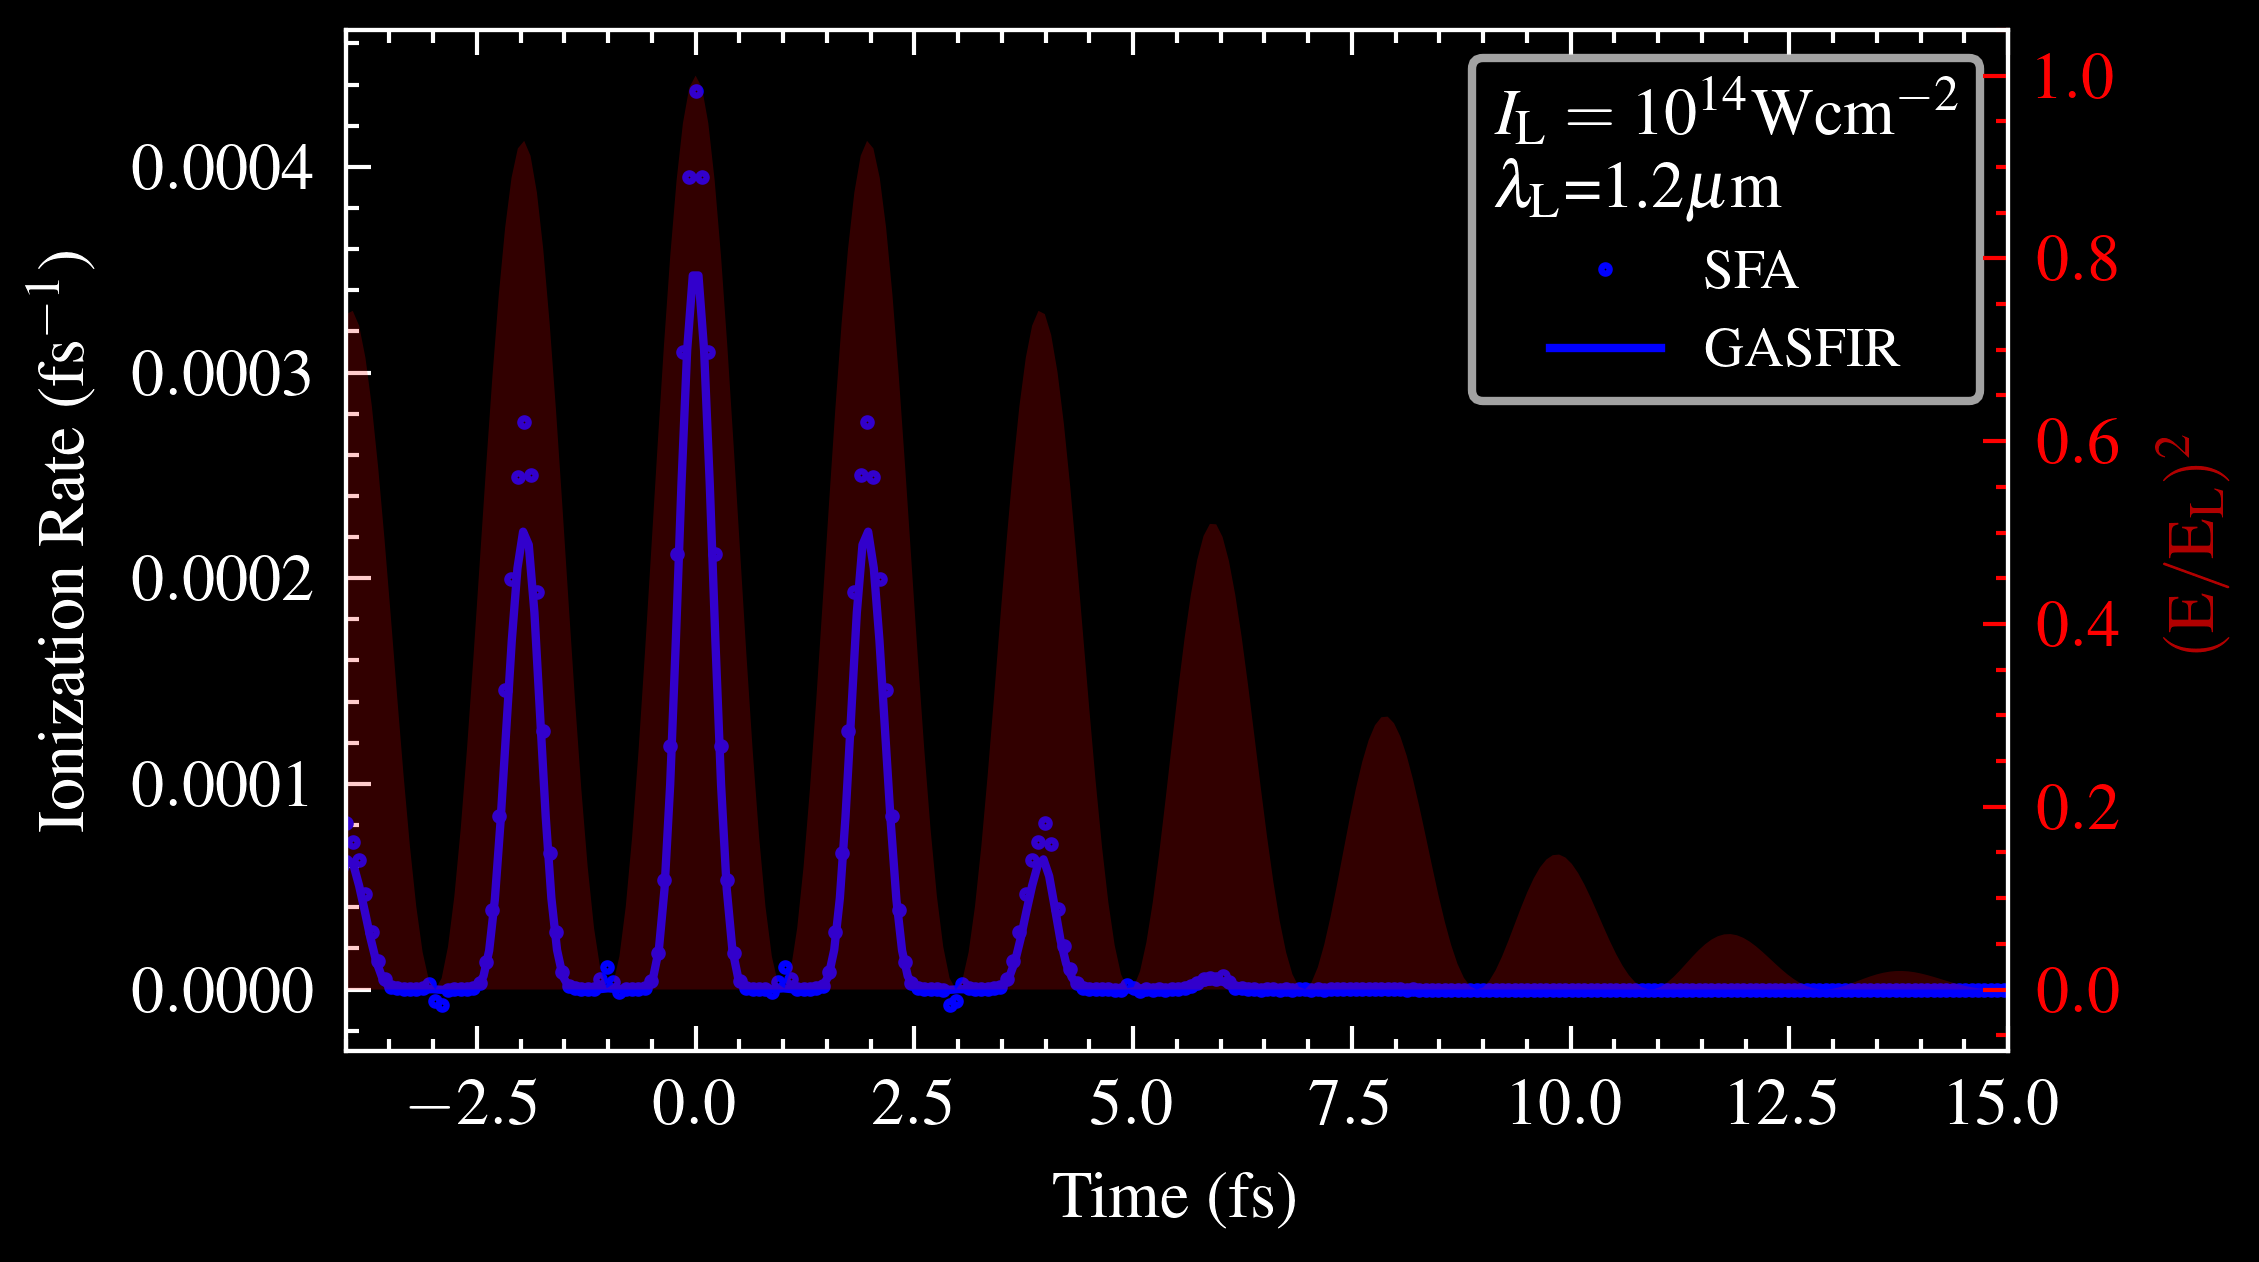

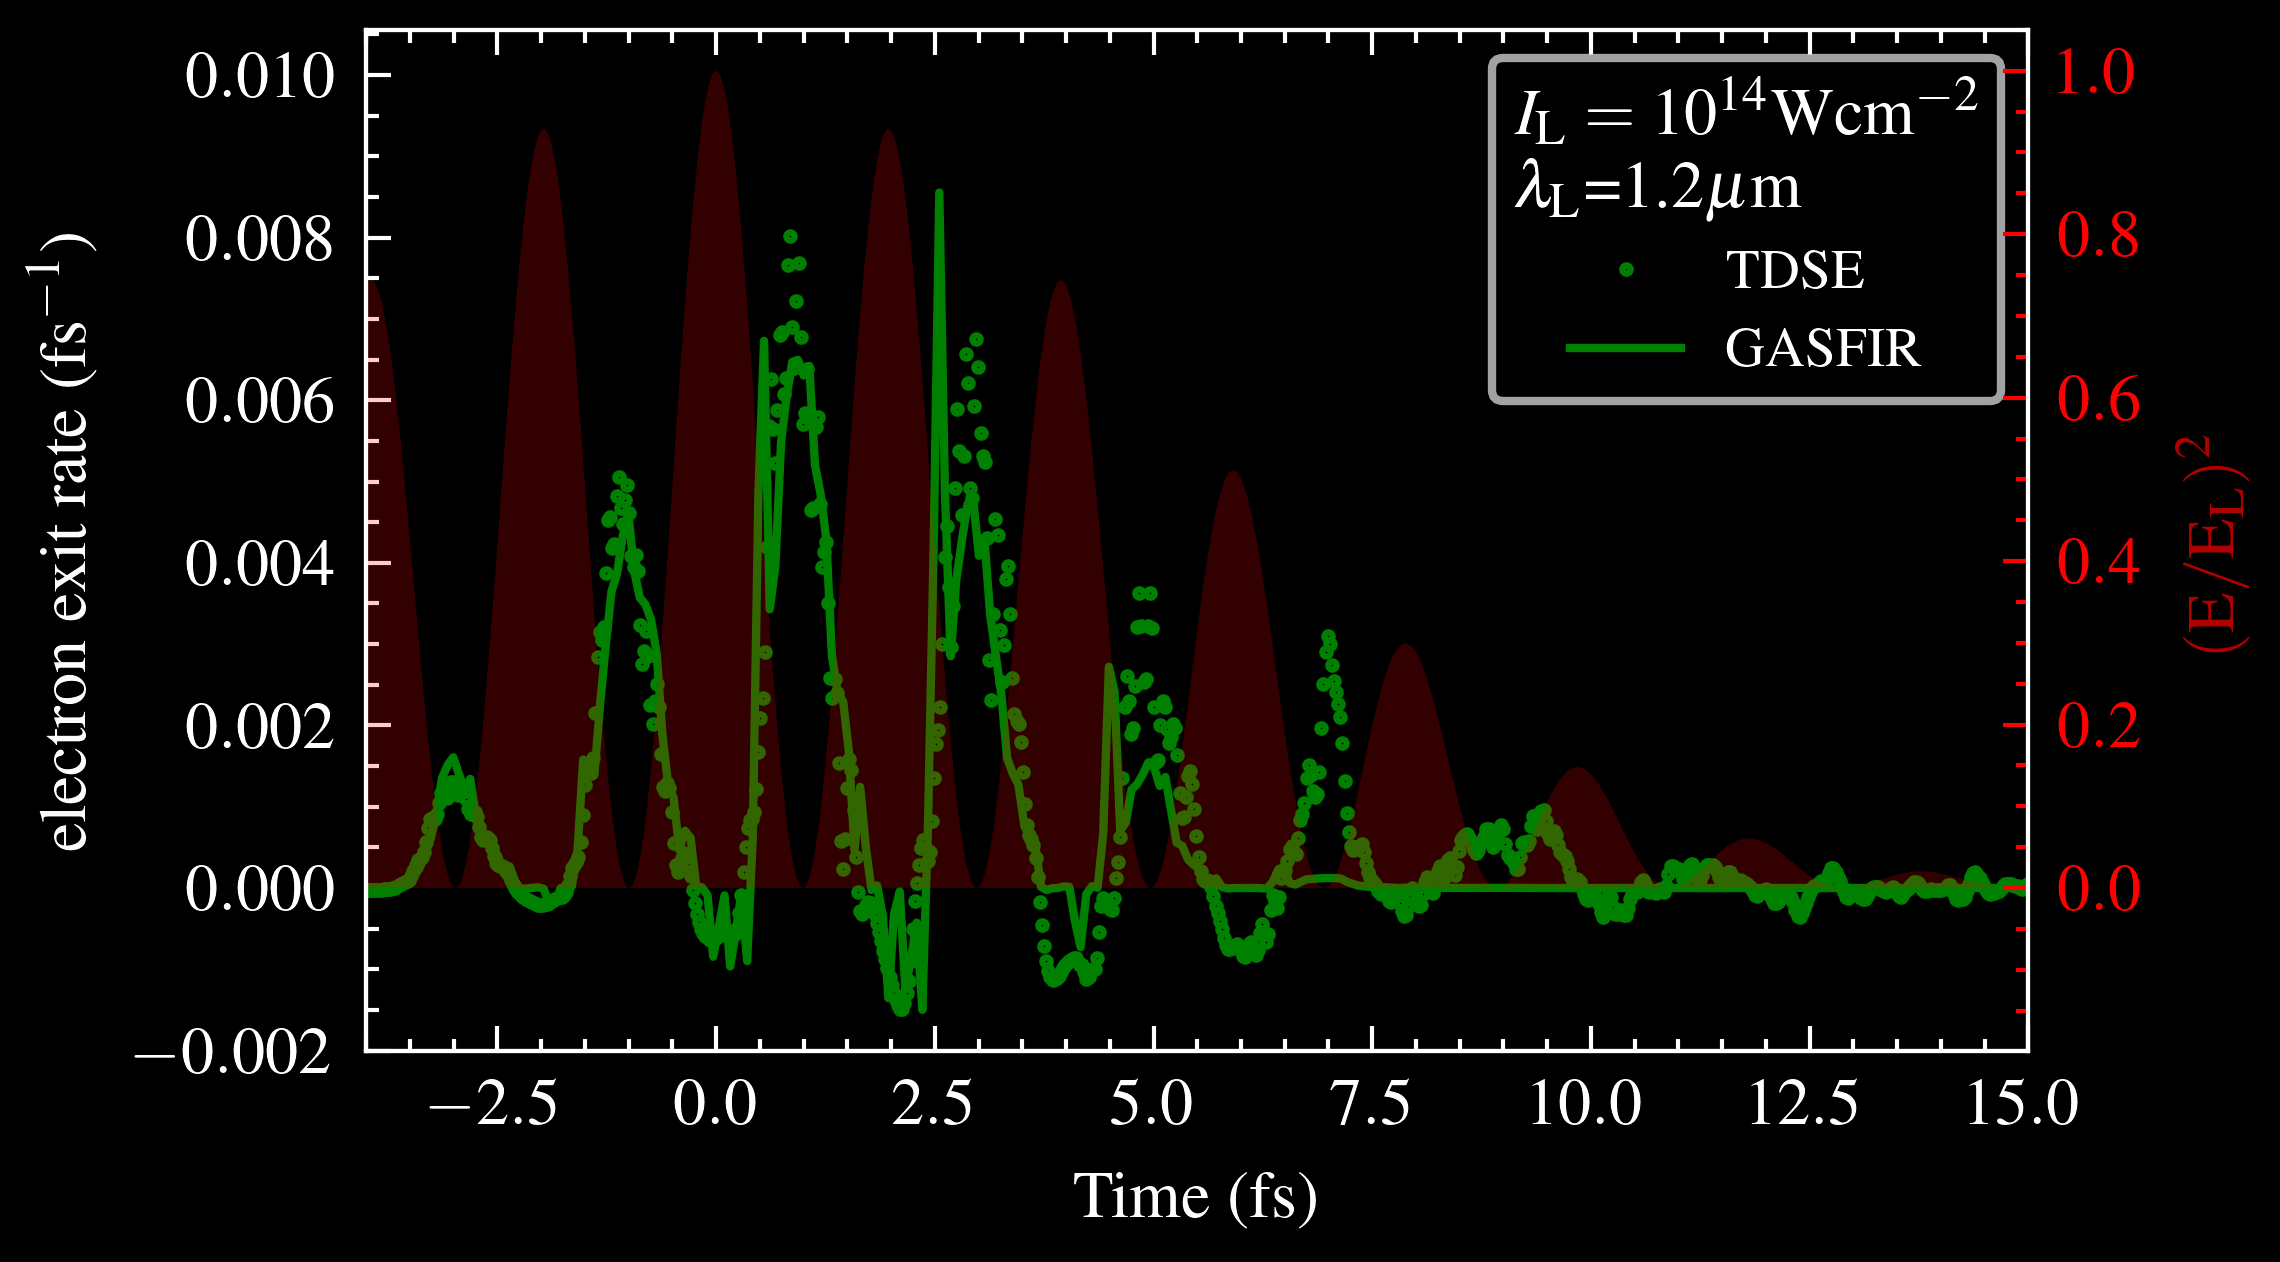

In [5]:
%autoreload
import matplotlib.pyplot as plt
import json
import scienceplots
from scipy.interpolate import make_smoothing_spline, make_interp_spline
from __init__ import AtomicUnits as AU
plt.style.use(['science', 'ieee'])
from scipy.integrate import solve_ivp
from __init__ import dr_dt_3D, Z_birth, jacobian, align_yaxis
from model import create_pulse
from kernels import IonProb, IonRate


E_probe=lambda t: 0
E_probe=np.vectorize(E_probe)
beta=0
y_b=0
v_y=0.5
coul_fact=1

def get_data_point(data, wave_length, intensity, FWHM_OC, cep):
    return data[(data.wavel == wave_length) & (data.intens == intensity) & (data.FWHM_OC == FWHM_OC) & np.isclose(data.cep ,cep)]#.iloc[-1]#.to_dict()
# import tRecX data with rates 
SFA_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/SFA_P_fit_data.pkl')
# SFA_fitted_data["rate"]=SFA_fitted_data.apply(lambda x: np.cumsum(x.rate), axis=1)
tRecX_rate_data=pd.read_csv('GASFIR/Data/Unprocessed/tRecX_data_with_rate.csv')
tRecX_rate_data["pulses"] = tRecX_rate_data.apply(lambda dat: add_pulses(dat), axis=1)
tRecX_rate_data["t"]=tRecX_rate_data.apply(lambda x: json.loads(x.t), axis=1)
# tRecX_rate_data["rate"]=tRecX_rate_data.apply(lambda x: np.diff(json.loads(x.rate), prepend=0), axis=1)
tRecX_rate_data["rate"]=tRecX_rate_data.apply(lambda x: json.loads(x.rate), axis=1)

# tRecX_rate = get_data_point(tRecX_rate_data, wave_length, intensity, FWHM_OC, cep)
# rate_fit= model_unified(tRecX_params, tRecX_rate)
# tRecX_rate= tRecX_rate.iloc[0]
# plt.plot(tRecX_rate["t"], tRecX_rate["rate"], label='Numerical Data')
# plt.plot(tRecX_rate["t"], np.cumsum(rate_fit[0]), label='Fit')

# Create subplots
fig1, ax1 = plt.subplots(1, 1, sharex=True, figsize=set_size(469.755, fraction=0.55, subplots=(1, 1)))
# plt.text(-1.8, 0.0007, 'SFA', fontsize=12, verticalalignment='center', horizontalalignment='center', rotation=00)
fig2, ax2 = plt.subplots(1, 1, sharex=True, figsize=set_size(469.755, fraction=0.55, subplots=(1, 1)))
# plt.text(-0.7, 0.007, r'TDSE \newline $P(|r|>21\mathrm{\AA})$', fontsize=12, verticalalignment='center', horizontalalignment='center', rotation=00)
axs=[ax1, ax2]
axs[0].set_xlabel('Time (fs)')
axs[1].set_xlabel('Time (fs)')
axs[0].set_ylabel(r'ionization rate ($\mathrm{fs}^{-1}$)')
axs[1].set_ylabel(r'electron exit rate ($\mathrm{fs}^{-1}$)')

# Function to plot data
def plot_cumRate(ax, data, color, label_prefix, params, pulse_par, type="SFA"):
    wave_length=pulse_par["wavel"]
    intensity=pulse_par["intens"]
    FWHM_OC=pulse_par["FWHM_OC"]
    cep=pulse_par["cep"]
   
    

    data["Function_to_fit"]="IonRate"
    data_point=get_data_point(data, wave_length, intensity, FWHM_OC, cep)
    if data_point.empty and type=="SFA":
        pulse=create_pulse(wavel=wave_length, intens=intensity, fwhmCyc=FWHM_OC, cep=cep)
        Prob, (t, rate)=IonProb(pulse, {"E_g":0.5, "div_p":2, "div_theta":1}, dT=0.25, kernel_type="exact_SFA", ret_Rate=True)
        data_point=pd.DataFrame({"t":[np.nan], "rate":[np.nan], "pulses":pulse, "Function_to_fit":"IonRate"})
        data_point["t"]=data_point["t"].astype(object)
        data_point["rate"]=data_point["rate"].astype(object)
        data_point.at[0,"t"]=t
        data_point.at[0,"rate"]=rate
    elif data_point.empty and type=="TDSE":
        return None
    # else:
    data_fit=model_unified(params, data_point)
    data_point=data_point.iloc[0]
    pulse=data_point.pulses
    field_values=pulse.Electric_Field(data_point["t"])

        
    

     # Plot the field
    # myPulse=create_pulse(wavel=wave_length, intens=intensity, fwhmCyc=FWHM_OC, cep=cep)
    
    ax2= ax.twinx()
    twinYvalues=(field_values/max(abs(field_values)))**2#/0.02849451308*1e15
    # ax2.plot(x_values, field_values, color='red', label='Field', alpha=0.1)
    ax2.fill_between(np.asarray(data_point["t"])*AU.fs, twinYvalues, facecolor='red', alpha=0.2)
    # ax2.yaxis.set_tick_params(labelright=True, color='red')
    # ax2.tick_params(axis='y', which='minor', color='red')
    ax2.tick_params(axis='y', which='both', colors='red')
    ax1.set_ylabel('Ionization Rate (fs$^{-1}$)')
    #ax2.set_ylabel(r'intensity ($\mathrm{Wcm^{-2}}$)', color='red', alpha=0.7)
    ax2.set_ylabel(r'$\mathrm{(E/E_L)^2}$', color='red', alpha=0.7)

    if type=="TDSE":
        # differentiate to get instantaneous flux with rrespect to time
        data_point["rate"]=np.gradient(data_point["rate"], data_point["t"], edge_order=2)
    ax.plot(np.asarray(data_point["t"])*AU.fs, np.asarray(data_point["rate"])/AU.fs, '.', color=color, markerfacecolor='none', markersize=1.5, label=rf'{type}', alpha=1)
    if type=="TDSE":
        Gamma_spline=make_interp_spline(data_point["t"], data_fit[0])
        x=np.linspace(min(min(data_point["t"]),-500), max(max(data_point["t"]),1000), 10000)
        t_pulse_begin, t_pulse_end=pulse.get_time_interval()
        Time=np.arange(int(t_pulse_begin), t_pulse_end+500,  1)  
        n_e=np.zeros_like(Time)
        for t_b in Time:
            #break
            if abs(Gamma_spline(t_b))<1e-10:
                continue
            x_b,z_b,v_x, v_z=Z_birth(pulse.Electric_Field(t_b)[0], E_probe(t_b)+1e-3, beta, -0.5)
            solution=solve_ivp(dr_dt_3D, [t_b, t_pulse_end+500], (x_b,y_b,z_b,v_x,v_y,v_z), args=(pulse.Electric_Field, E_probe, beta, coul_fact), method='BDF', vectorized=True, jac=jacobian, t_eval=np.arange(t_b, t_pulse_end+500, 1)) # , max_step=5
            r_ab=np.sqrt(solution.y[0,:]**2+solution.y[1,:]**2+beta**2+solution.y[2,:]**2)  
            #r_ab=abs(solution.y[2,:])   
            e_present=(r_ab>=40)*Gamma_spline(t_b)
            n_e[np.isin(Time, solution.t)]+=e_present
        spline=make_smoothing_spline(Time, n_e)
        n_e=np.gradient(spline(Time), Time, edge_order=2)
        spline=make_smoothing_spline(Time, n_e)
    else:
        spline=make_interp_spline(data_point["t"], data_fit[0])
    x=np.linspace(min(data_point["t"]), max(data_point["t"]), 1000)
    ax.plot(x*AU.fs, spline(x)/AU.fs, color=color, label="GASFIR", linestyle='-', linewidth=1)
    
    align_yaxis(ax, ax2)
    return data_point.pulses

# plot_data(axs[1], tRecX_rate_data, 'blue', 'SFA', params=tRecX_params, pulse_par={"wavel": 1000, "intens": 1e14, "FWHM_OC": 3, "cep": 0})
# Plot for SFA_fitted_data with different intensities
nl="\n"
for intensity, color, wave_length in [(1e14, 'blue', 1200)]:
    plot_cumRate(axs[0], SFA_fitted_data, color, rf'$\lambda_\mathrm{{L}}={wave_length/1000:.1f} \mathrm{{\mu m}}$', params=SFA_params, pulse_par={"wavel": wave_length, "intens": intensity, "FWHM_OC": 3, "cep": 0})

for intensity, color, wave_length in [(1.e14, 'green', 1200)]:
    # break
    # , (1.e14, 'darkseagreen', 800)  (1.e14, 'dodgerblue', 1000), 
    plot_cumRate(axs[1], tRecX_rate_data, color, rf'$\lambda_\mathrm{{L}}$={wave_length/1000} $\mu m$', params=tRecX_params, pulse_par={"wavel": wave_length, "intens": intensity, "FWHM_OC": 3, "cep": 0}, type="TDSE")

axs[0].set_xlim(-4,15)
axs[1].set_xlim(-4,15)
axs[1].legend(fancybox=True, frameon=True, title=rf'$I_\mathrm{{L}}=10 ^{{14}}\mathrm{{Wcm^{{-2}}}}$'"\n"rf'$\lambda_\mathrm{{L}}$={1200/1000}$\mathrm{{\mu m}}$', fontsize='small', loc='upper right')
axs[0].legend(fancybox=True, frameon=True, title=rf'$I_\mathrm{{L}}=10 ^{{14}}\mathrm{{Wcm^{{-2}}}}$'"\n"rf'$\lambda_\mathrm{{L}}$={1200/1000:.1f}$\mathrm{{\mu m}}$', fontsize='small', loc='upper right')
fig1.savefig("GASFIR/images/fig2_SFA.eps", format="eps", bbox_inches="tight")
fig1.savefig("GASFIR/images/fig2_SFA.pdf", format="pdf", bbox_inches="tight")
fig2.savefig("GASFIR/images/fig2_tRecX.eps", format="eps", bbox_inches="tight")
fig2.savefig("GASFIR/images/fig2_tRecX.pdf", format="pdf", bbox_inches="tight")

## figure 4 Quasi-Static Quantification

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_2250206/3812406580.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fieldScaled=data.field*AU.Volts_per_Angstrom
/tmp/ipykernel_2250206/3812406580.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fieldScaled=data.field*AU.Volts_per_Angstrom
/tmp/ipykernel_2250206/3812406580.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.fieldScaled=data.field*AU.Volts_per_Angstrom


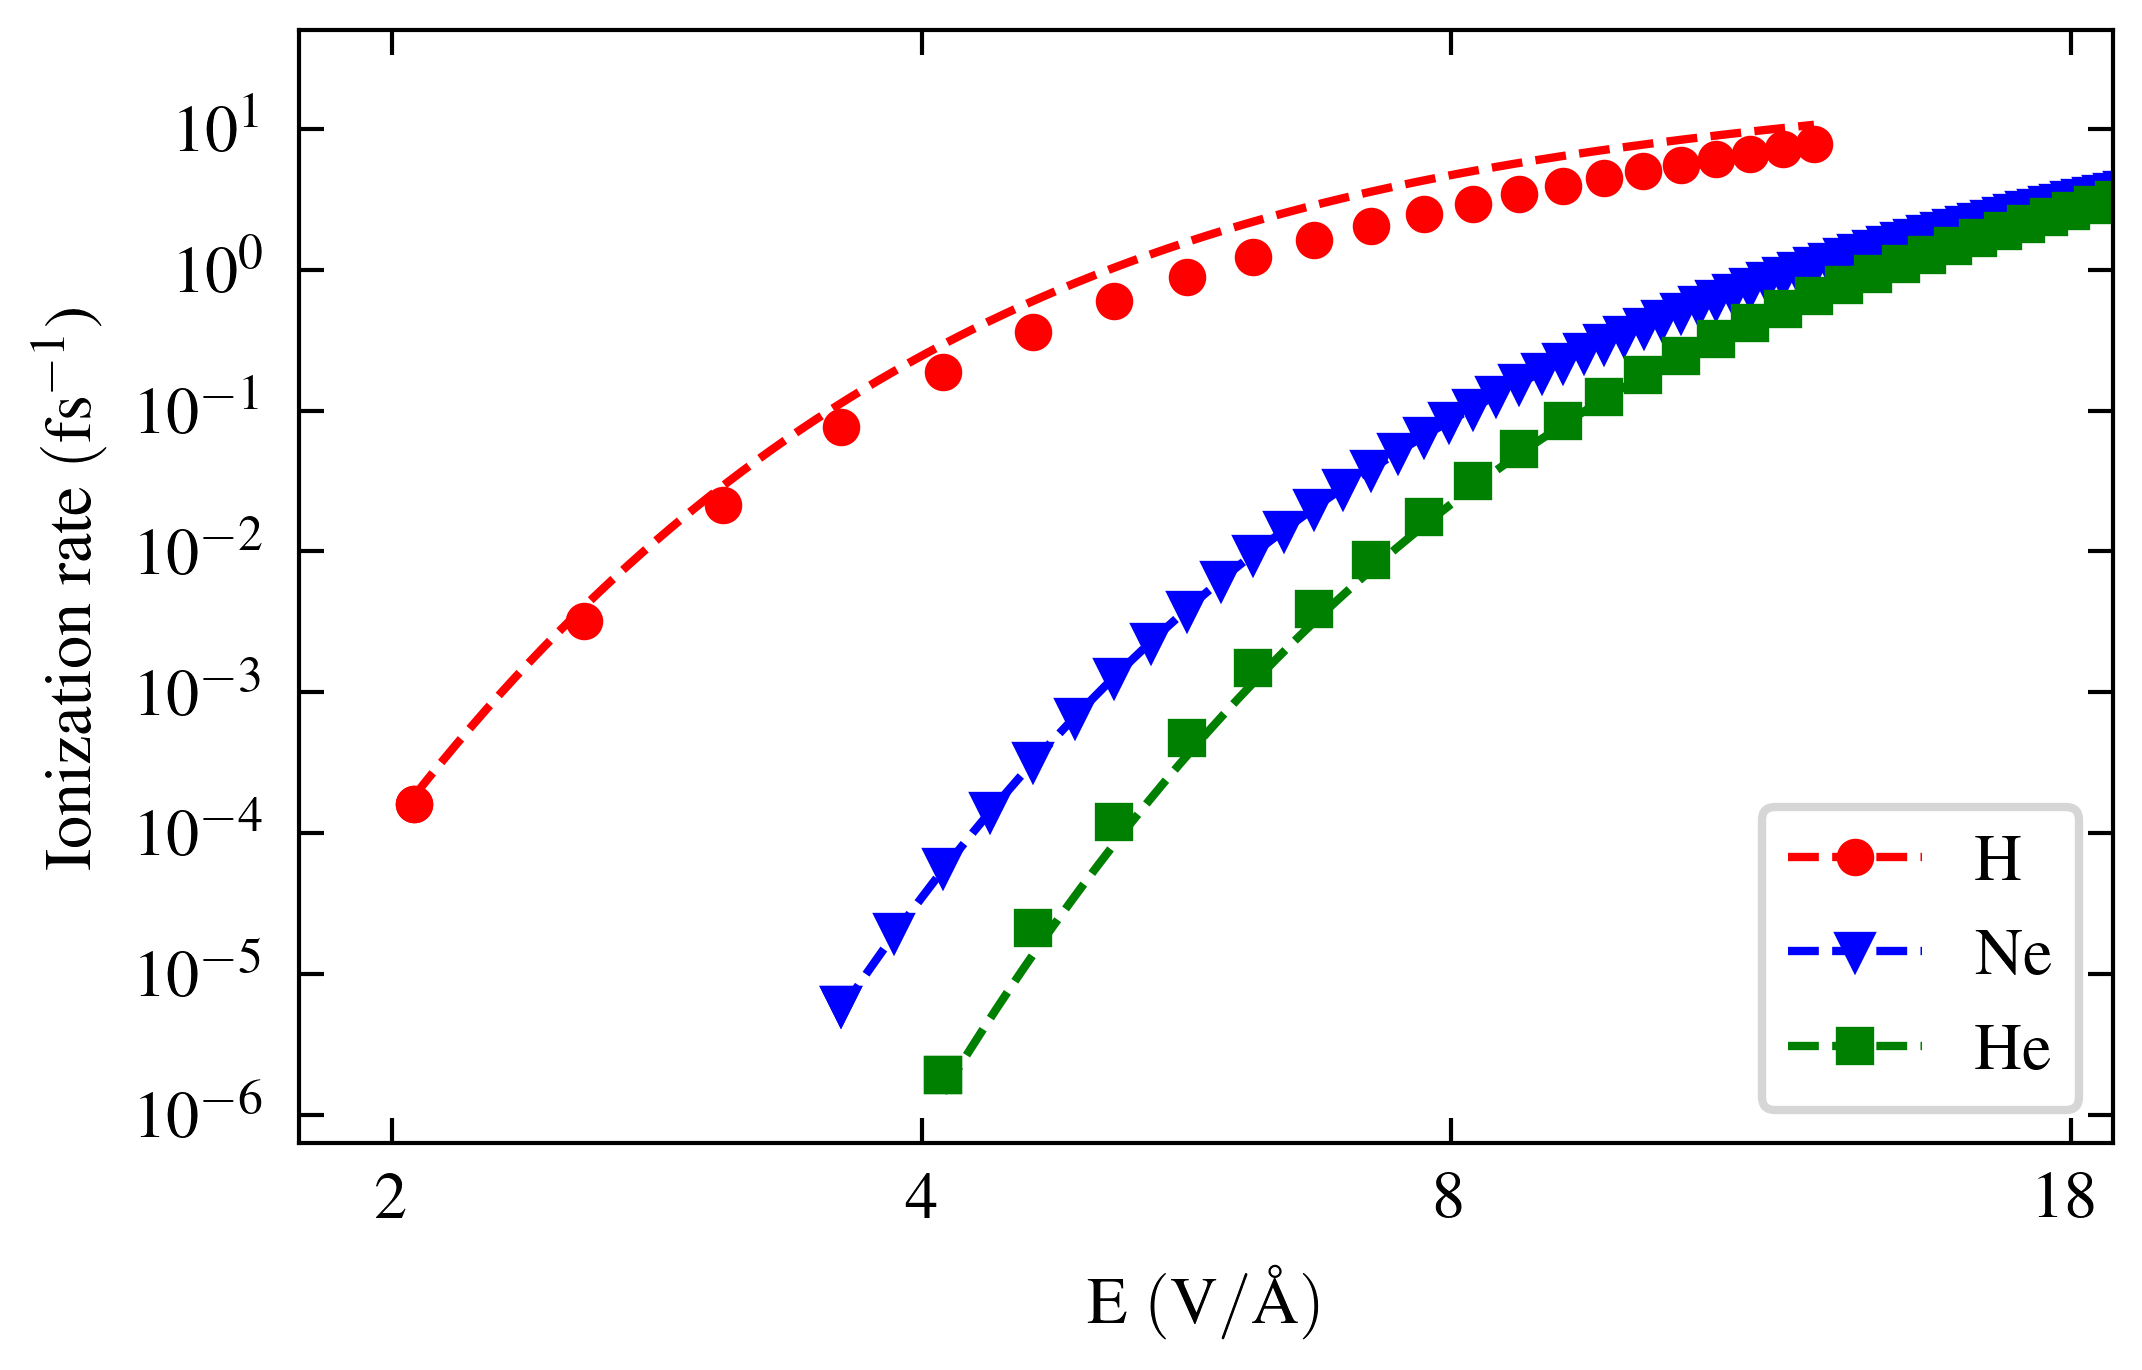

In [15]:
from __init__ import AtomicUnits as AU
from __init__ import IpEV_dict
plt.style.use(['science', 'ieee'])
# create three sub plots with common x axis and y axises: central cycle FWHM error, error ion. probability, ratio peak ion. rate to local maxima
# import data

# Create subplots
%load_ext autoreload
%autoreload
from kernels import QSRate
fig, axs =  plt.subplots(1, 1, sharex=True, figsize=set_size(469.755, fraction=0.6, subplots=(1, 1)))
def plot_data(ax, color, gas, marker):
    if gas=="H":
        with open('GASFIR/Data/WithFit/tRecX_P_QSnA_Fit_model.pkl', 'rb') as f:
            out = pickle.load(f)
        params=out.params
        tRecX_nA_QS_params=params
        # params=tRecX_params
    else:
        with open(f'GASFIR/Data/WithFit/QSModels/{gas}_model.pkl', 'rb') as f:
            out = pickle.load(f)
            params = out.params
    data = pd.read_csv(f'GASFIR/Data/WithFit/QSModels/{gas}_fit_data.csv')
    data = data[data.field<=(IpEV_dict[gas]/27.2114)**2] # only plot up to 4 times OBI
    data.fieldScaled=data.field*AU.Volts_per_Angstrom
    ax.plot(data.fieldScaled, np.exp(data.Y)/AU.fs, marker, color=color, markersize=3.5)#, label=f'{gas}')
    ax.plot(data.fieldScaled[0], np.exp(data.Y)[0]/AU.fs, linestyle="--", marker=marker, color=color, markersize=3.5, label=f'{gas}')
    field=np.linspace(data.field.min(),data.field.max(), 1000)
    # field=np.linspace(0.01, 0.25, 1000)
    ax.plot(field*AU.Volts_per_Angstrom, 1*(QSRate(field, param_dict=params.valuesdict()))/AU.fs, '--', color=color)

gases=["H", "Ne", "He"]
for gas, color, marker in zip(gases, ['red', 'blue', 'green'], ['o', 'v', 's']):
    plot_data(axs, color, gas, marker)
    
plt.yscale('log')
plt.xscale('log')

# Get the current x-axis limits
x_min, x_max = axs.get_xlim()
xupper = 18
plt.xlim(x_min, xupper+1)

# Calculate the tick positions
ticks = np.round(np.geomspace(x_min, xupper, 4),0)
# Set the tick positions and labels
axs.set_xticks(ticks)
axs.set_xticklabels([f'{int(tick)}' for tick in ticks])
axs.minorticks_off()

# Show the plot

leg=plt.legend(fancybox=True, frameon=True, alignment='center', loc='lower right') #, title='- - GASFIR'
leg.get_title().set_fontsize('small')
leg.get_title().set_fontweight('bold')
plt.xlabel(r'E $\mathrm{(V/\AA)}$')
plt.ylabel(r'Ionization rate $(\mathrm{fs}^{-1}$)')
# plt.savefig("GASFIR/images/fig3.eps", format="eps", bbox_inches="tight")
plt.savefig("GASFIR/images/fig3.pdf", format="pdf", bbox_inches="tight")
fig.show()

## fig5 effect of diabaticity old

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


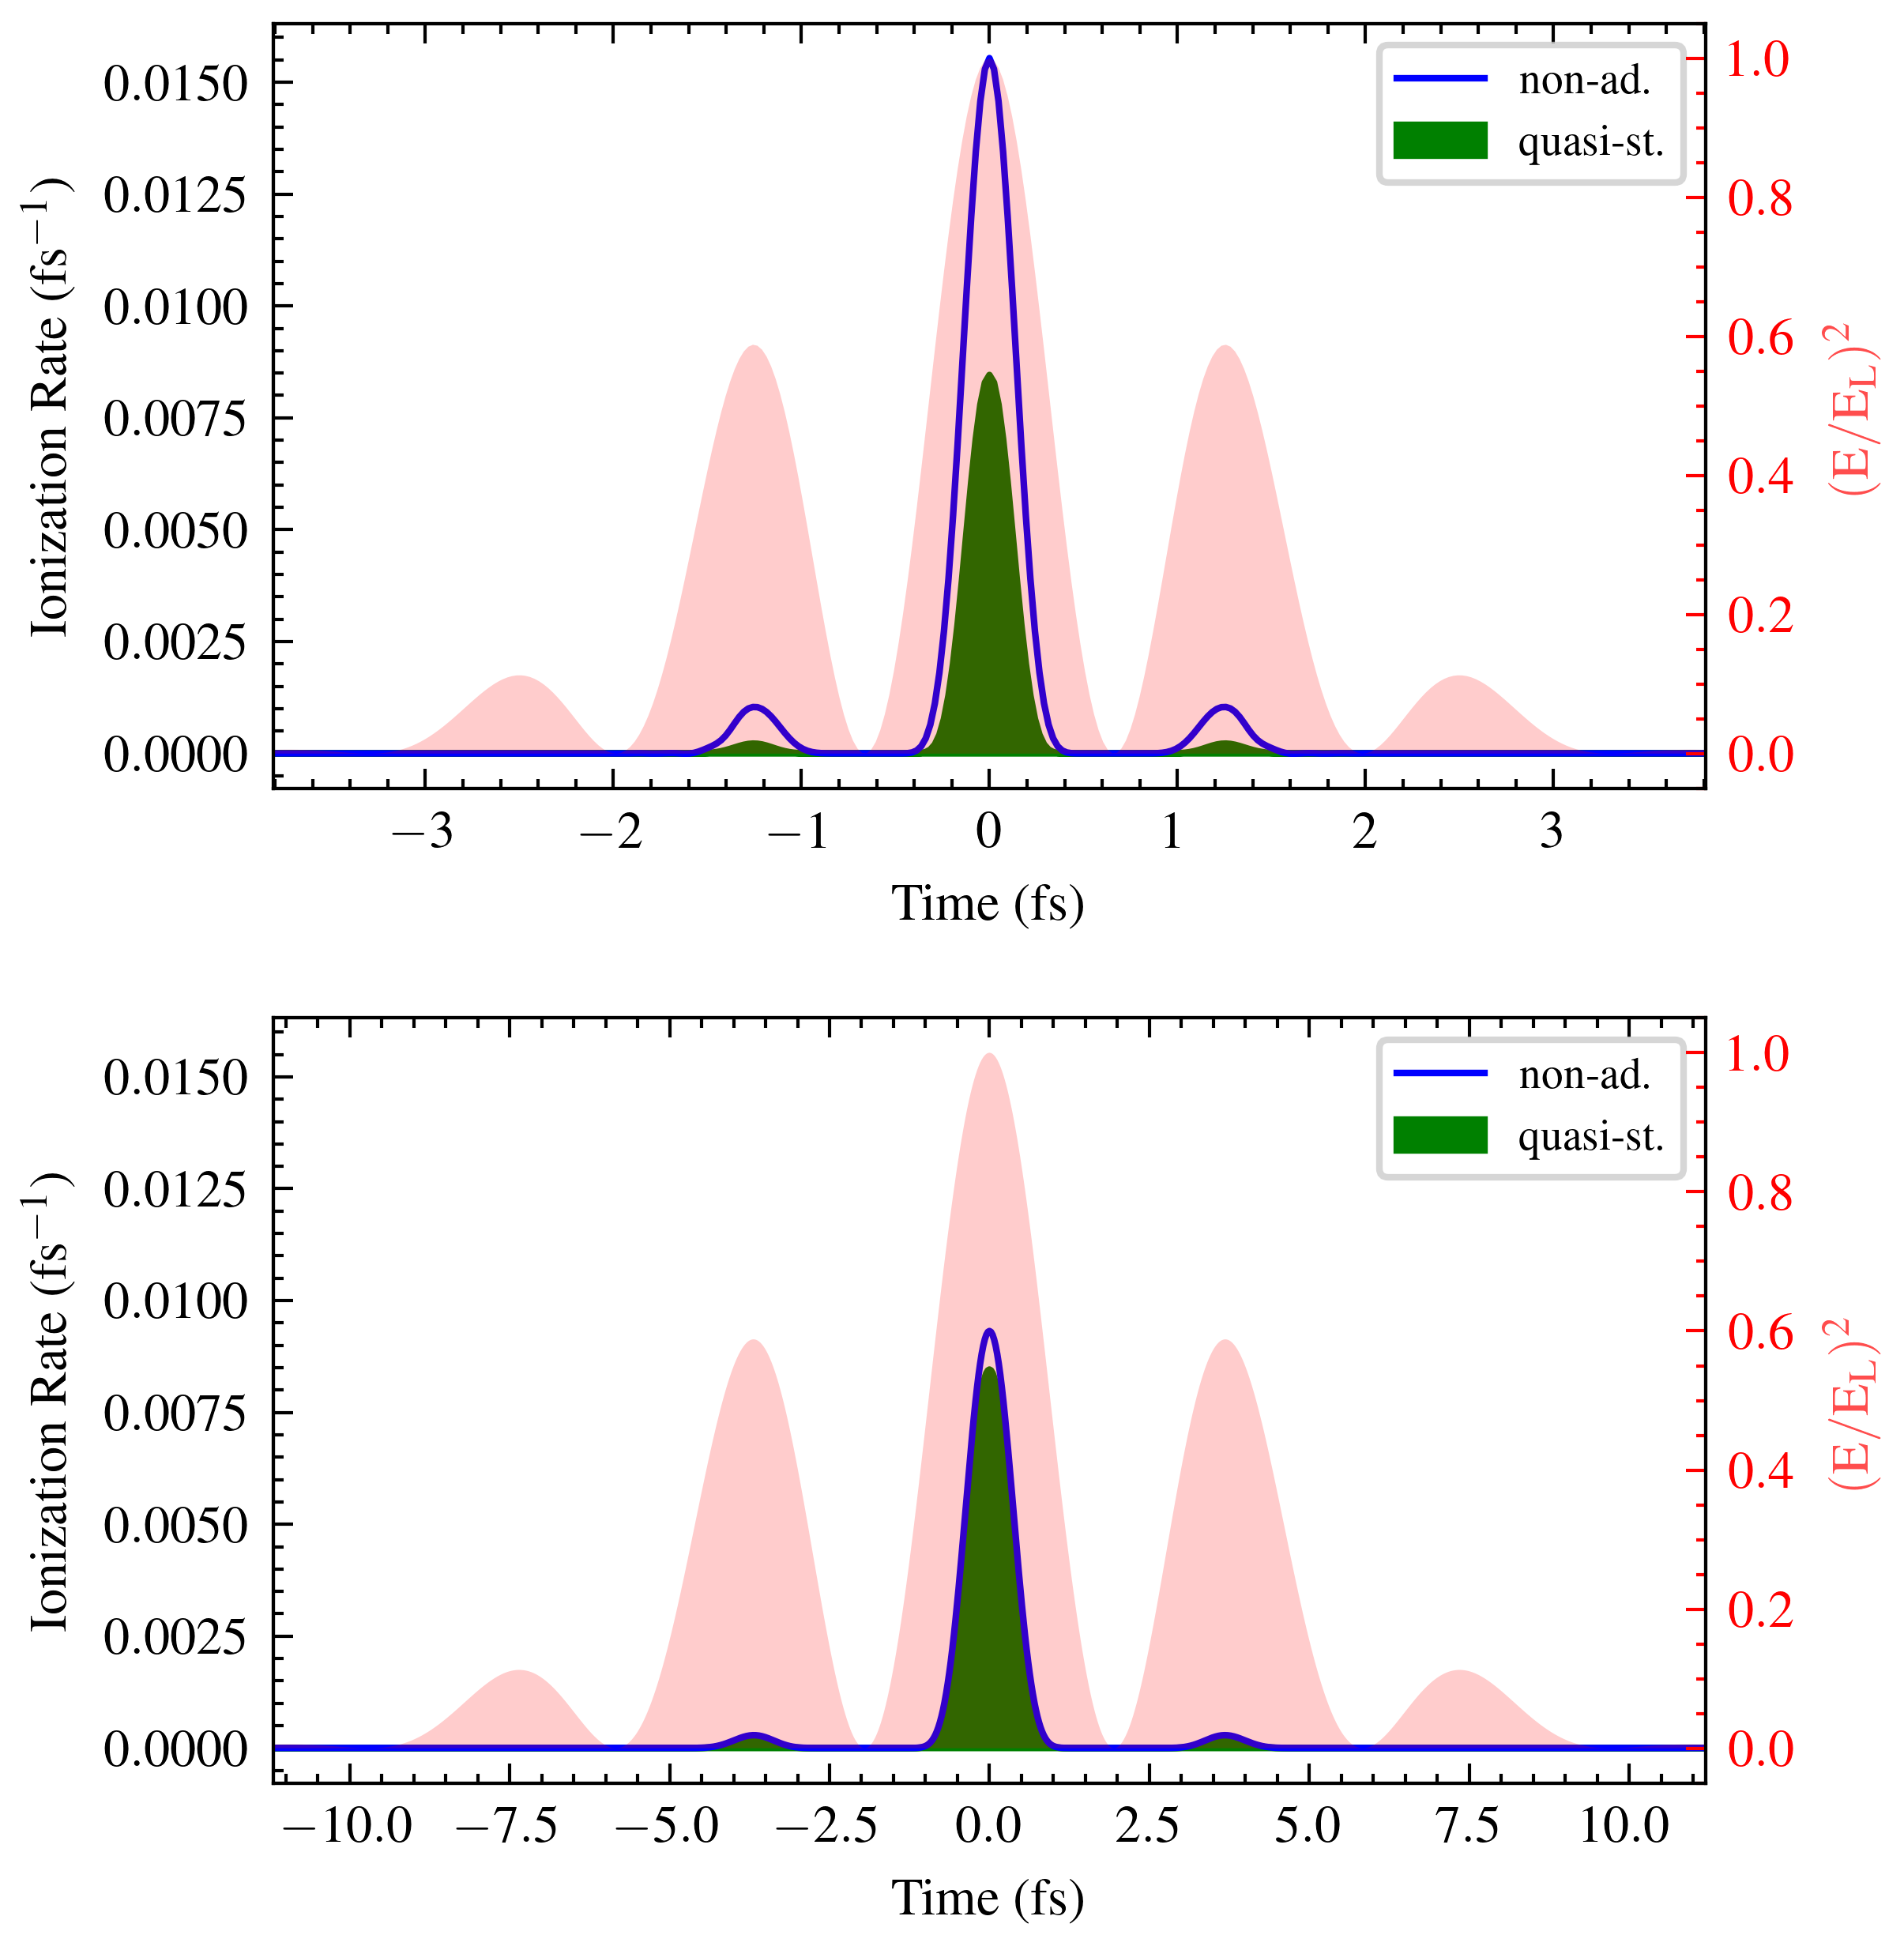

In [16]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from model import create_pulse
from kernels import IonRate, QSRate
plt.style.use(['science', 'ieee'])



# Generate the plot
fig, axs = plt.subplots(2, 1, sharey=True, figsize=set_size(469.755, fraction=0.6, subplots=(2, 1)))
def plot_ion_rate(ax1, params, pulse, iter):
    # Plot the ionization rate
    t_min, t_max = pulse.get_time_interval()
    time_ar= np.arange(int(t_min), np.ceil(t_max), 1)
    x_values = time_ar*AU.fs
    field_values=pulse.Electric_Field(time_ar)
    nArate = IonRate(time_ar, pulse, param_dict=params.valuesdict(), dT=0.25)
    qsRate = QSRate(field_values, param_dict=params.valuesdict())
    ax1.plot(x_values, nArate/AU.fs, label='non-ad.', color="blue")
    ax1.fill_between(x_values, qsRate/AU.fs, label='quasi-st.', color="green")
    ax1.set_xlabel('Time (fs)')
    ax1.set_xlim(min(x_values)/2, max(x_values)/2)

    # Plot the field
    ax2= ax1.twinx()
    twinYvalues=(field_values/max(abs(field_values)))**2#/0.02849451308*1e15
    # ax2.plot(x_values, field_values, color='red', label='Field', alpha=0.1)
    ax2.fill_between(x_values, twinYvalues, facecolor='red', alpha=0.2)
    # ax2.yaxis.set_tick_params(labelright=True, color='red')
    # ax2.tick_params(axis='y', which='minor', color='red')
    ax2.tick_params(axis='y', which='both', colors='red')
    ax1.set_ylabel('Ionization Rate (fs$^{-1}$)')
    #ax2.set_ylabel(r'intensity ($\mathrm{Wcm^{-2}}$)', color='red', alpha=0.7)
    ax2.set_ylabel(r'$\mathrm{(E/E_L)^2}$', color='red', alpha=0.7)

# Set the legend
iter=0
myPulses = [create_pulse(850, 1e14, 0, 1),create_pulse(2500, 1e14, 0, 1)]
for ax, params, pulse in zip(axs, [tRecX_params, tRecX_params], myPulses):
    plot_ion_rate(ax, params, pulse, iter)
    iter+=1
axs[1].legend(fancybox=True, frameon=True, fontsize='small')
axs[0].legend(fancybox=True, frameon=True, fontsize='small')
plt.subplots_adjust(wspace=0, hspace=0.3)
# Show the plot
fig.savefig("GASFIR/images/fig4.eps", format="eps", bbox_inches="tight")
fig.savefig("GASFIR/images/fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()




## fig5 effect of diabaticity

5.02095269109133


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


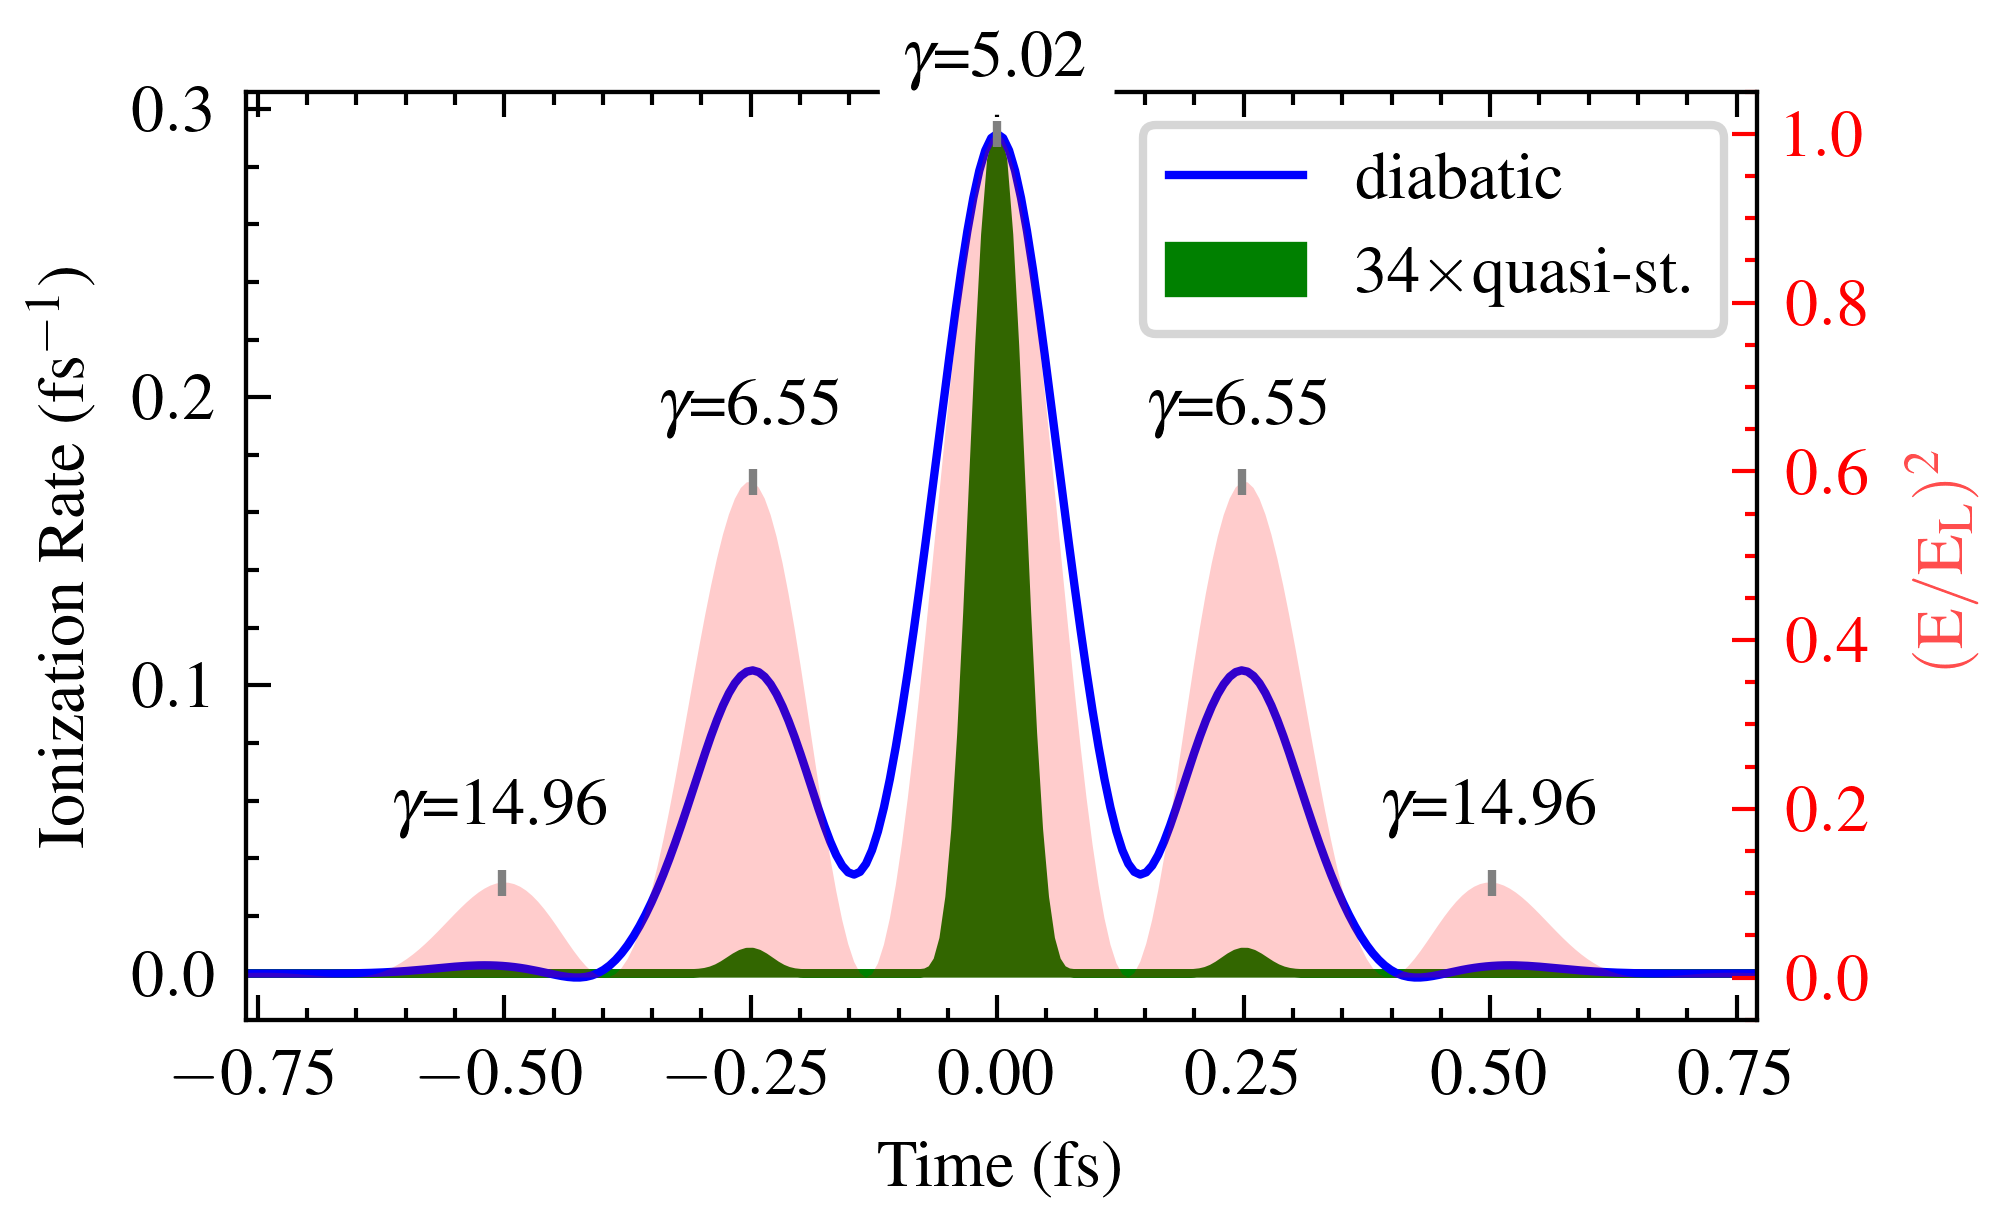

In [18]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
%autoreload
import matplotlib.pyplot as plt
from model import create_pulse
from kernels import IonRate, QSRate
import scienceplots
from __init__ import AtomicUnits as AU
plt.style.use(['science', 'ieee'])
from scipy.signal import find_peaks



# Generate the plot
fig, axs = plt.subplots(1, 1, sharey=True, figsize=set_size(469.755, fraction=0.5, subplots=(1, 1)))
def plot_ion_rate(ax1, params, pulse, iter):
    # Plot the ionization rate
    t_min, t_max = pulse.get_time_interval()
    time_ar= np.arange(int(t_min), np.ceil(t_max), 0.25)
    x_values = time_ar*AU.fs
    field_values=pulse.Electric_Field(time_ar)
    nArate = IonRate(time_ar, pulse, param_dict=params, dT=0.25)
    qsRate = QSRate(field_values, param_dict=params)
    ax1.plot(x_values, nArate/AU.fs, label='diabatic', color="blue")
    ax1.fill_between(x_values, qsRate/AU.fs/max(qsRate)*max(nArate), label=rf'${1/max(qsRate)*max(nArate):.0f}\times$quasi-st.', color="green")
    ax1.set_xlabel('Time (fs)')
    ax1.set_xlim(min(x_values)/2, max(x_values)/2)

    # Plot the field
    ax2= ax1.twinx()
    omega= pulse.w0()[0]
    print(omega/max(field_values))
    twinYvalues=(field_values/max(abs(field_values)))**2#/0.02849451308*1e15
    #twinYvalues=1*(abs(field_values)/omega)
    # ax2.plot(x_values, field_values, color='red', label='Field', alpha=0.1)
    ax2.fill_between(x_values, twinYvalues, facecolor='red', alpha=0.2)
    # ax2.yaxis.set_tick_params(labelright=True, color='red')
    # ax2.tick_params(axis='y', which='minor', color='red')
    ax2.tick_params(axis='y', which='both', colors='red')
    ax1.set_ylabel('Ionization Rate (fs$^{-1}$)')
    #ax2.set_ylabel(r'intensity ($\mathrm{Wcm^{-2}}$)', color='red', alpha=0.7)
    ax2.set_ylabel(r'$\mathrm{(E/E_L)^2}$', color='red', alpha=0.7)
    


    # Find peaks (both positive and negative) to identify subcycle peaks
    peaks, _ = find_peaks(twinYvalues, height=0.1)  # Adjust height threshold as needed
    Ip = 0.5  # Example for hydrogen in a.u.
    omega = pulse.w0()[0]  # Already in atomic units?

    E_peaks = field_values[peaks]
    gamma_values = omega * (2 * Ip)**0.5 / abs(E_peaks)
    for i, peak in enumerate(peaks):
        time = x_values[peak]
        gamma = gamma_values[i]
        ax2.scatter(time, twinYvalues[peak], marker='|', s=10, color='grey')  # Mark the peak
        ax2.annotate(r'$\gamma$'+f'={gamma:.2f}', xy=(time, twinYvalues[peak]),
        xytext=(time, twinYvalues[peak]+0.07),
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='white', alpha=1),
            color='black', fontsize=8, rotation=00,
                    ha='center')

# Set the legend
iter=0
myPulses = [create_pulse(170, 1e14, np.pi/2*0, 1)]#,create_pulse(2500, 1e14, 0, 1)]
# for ax, params, pulse in zip(axs, [tRecX_params, tRecX_params], myPulses):
for ax, params, pulse in zip([axs], [tRecX_params], myPulses):
    plot_ion_rate(ax, params, pulse, iter)
    iter+=1
# axs[1].legend(fancybox=True, frameon=True, fontsize='small')
# axs[0].legend(fancybox=True, frameon=True, fontsize='small')
axs.legend(fancybox=True, frameon=True)#, fontsize='small')
plt.subplots_adjust(wspace=0, hspace=0.3)
# Show the plot
fig.savefig("GASFIR/images/fig4.eps", format="eps", bbox_inches="tight")
fig.savefig("GASFIR/images/fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()




# figure for atto abstract

0.8 0.010028596575250683


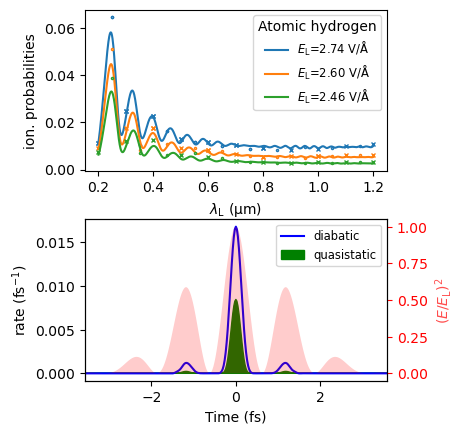

In [ ]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from __init__ import AtomicUnits as AU
import scienceplots
from scipy.interpolate import make_interp_spline
from model import create_pulse
from kernels import IonRate, QSRate


def plot_ion_rate(ax1, params, pulse):
    # Plot the ionization rate
    t_min, t_max = pulse.get_time_interval()
    time_ar= np.arange(int(t_min), np.ceil(t_max), 1)
    x_values = time_ar*AU.fs
    field_values=pulse.Electric_Field(time_ar)
    nArate = IonRate(time_ar, pulse, param_dict=params.valuesdict(), dT=0.25)
    qsRate = QSRate(field_values, param_dict=params.valuesdict())
    ax1.plot(x_values, nArate/AU.fs, label='diabatic', color="blue")
    ax1.fill_between(x_values, qsRate/AU.fs, label='quasistatic', color="green")
    ax1.set_xlabel('Time (fs)')
    ax1.set_xlim(min(x_values)/2, max(x_values)/2)

    # Plot the field
    ax2= ax1.twinx()
    twinYvalues=(field_values/max(abs(field_values)))**2#/0.02849451308*1e15
    # ax2.plot(x_values, field_values, color='red', label='Field', alpha=0.1)
    ax2.fill_between(x_values, twinYvalues, facecolor='red', alpha=0.2)
    # ax2.yaxis.set_tick_params(labelright=True, color='red')
    # ax2.tick_params(axis='y', which='minor', color='red')
    ax2.tick_params(axis='y', which='both', colors='red')
    ax1.set_ylabel('Ionization Rate (fs$^{-1}$)')
    #ax2.set_ylabel(r'intensity ($\mathrm{Wcm^{-2}}$)', color='red', alpha=0.7)
    ax2.set_ylabel(r'$(E/E_\mathrm{L})^2$', color='red', alpha=0.7)
def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    
    # data = data[data.wavel>=300]
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%50==0]
    #color="black"
    ax.plot(data.wavel/1000, data.Y, '.', color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 'x', color=color, markersize=3)#, label=f'{label_prefix} used for fit'
    
    
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    #a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), '-', color=color, label=label_prefix)#rf'$I = {a:.0f}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')
    if color=="C0":
        print(0.8, X_Y_Spline(800))


# Generate the plot
fig, axs = plt.subplots(2, 1, sharey=False, figsize=set_size(469.755, fraction=0.6, subplots=(2, 1)))
# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1e14, 'C0'),  (0.9e14, 'C1'), (0.8e14, 'C2')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs[0], data, color, r'$E_\mathrm{L}$='+f"{np.sqrt(intensity/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", params=tRecX_params) #sci_notation_base_power(intensity)

for ax, params, pulse in zip([axs[1]], [tRecX_params], [create_pulse(800, 1e14, 0, 1)]):
    plot_ion_rate(ax, params, pulse)
    
axs[0].legend(fancybox=True, frameon=True, fontsize='small', title="Atomic hydrogen")
axs[0].set_xlabel(r"$\lambda_\mathrm{L}$ ($\mathrm{\mu}$m)")
axs[0].set_ylabel("ion. probabilities")
# axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1].legend(fancybox=True, frameon=True, fontsize='small')
axs[1].set_ylabel('rate (fs$^{-1})$')
#axs[1].legend(title=r'$\lambda_\mathrm{L}$=0.8 $\mathrm{\mu}$m'"\n"r'$E_\mathrm{L}$='+f"{np.sqrt(1e14/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", fancybox=True, frameon=True)
axs[1].set_xlabel('Time (fs)')

plt.subplots_adjust(wspace=0, hspace=0.3)
# Show the plot
# fig.savefig("GASFIR/images/fig4.eps", format="eps", bbox_inches="tight")
plt.show()


In [ ]:
from matplotlib import patches
xyA = [0.8, 0.010028596575250683]
ax1=axs[0]
ax2=axs[1]
ax1.plot(*xyA, "o", alpha=0.5, color="grey")
xyB = [1.5, 0.017]
transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(ax1.transData.transform(xyA))
coord2 = transFigure.transform(ax2.transData.transform(xyB))
arrow = patches.FancyArrowPatch(
    coord2,  # posA
    coord1,  # posB
    shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
    shrinkB=0,  # so head is exactly on posB (default shrink is 2)
    transform=fig.transFigure,
    color="black",
    arrowstyle="-|>",  # "normal" arrow
    mutation_scale=10,  # controls arrow head size
    linewidth=1,
)
fig.patches.append(arrow)

fig.savefig("GASFIR/images/ATTOX.pdf", format="pdf", bbox_inches="tight")
plt.show()


# figure for attoworld seminar

0.8 0.015478587860988767


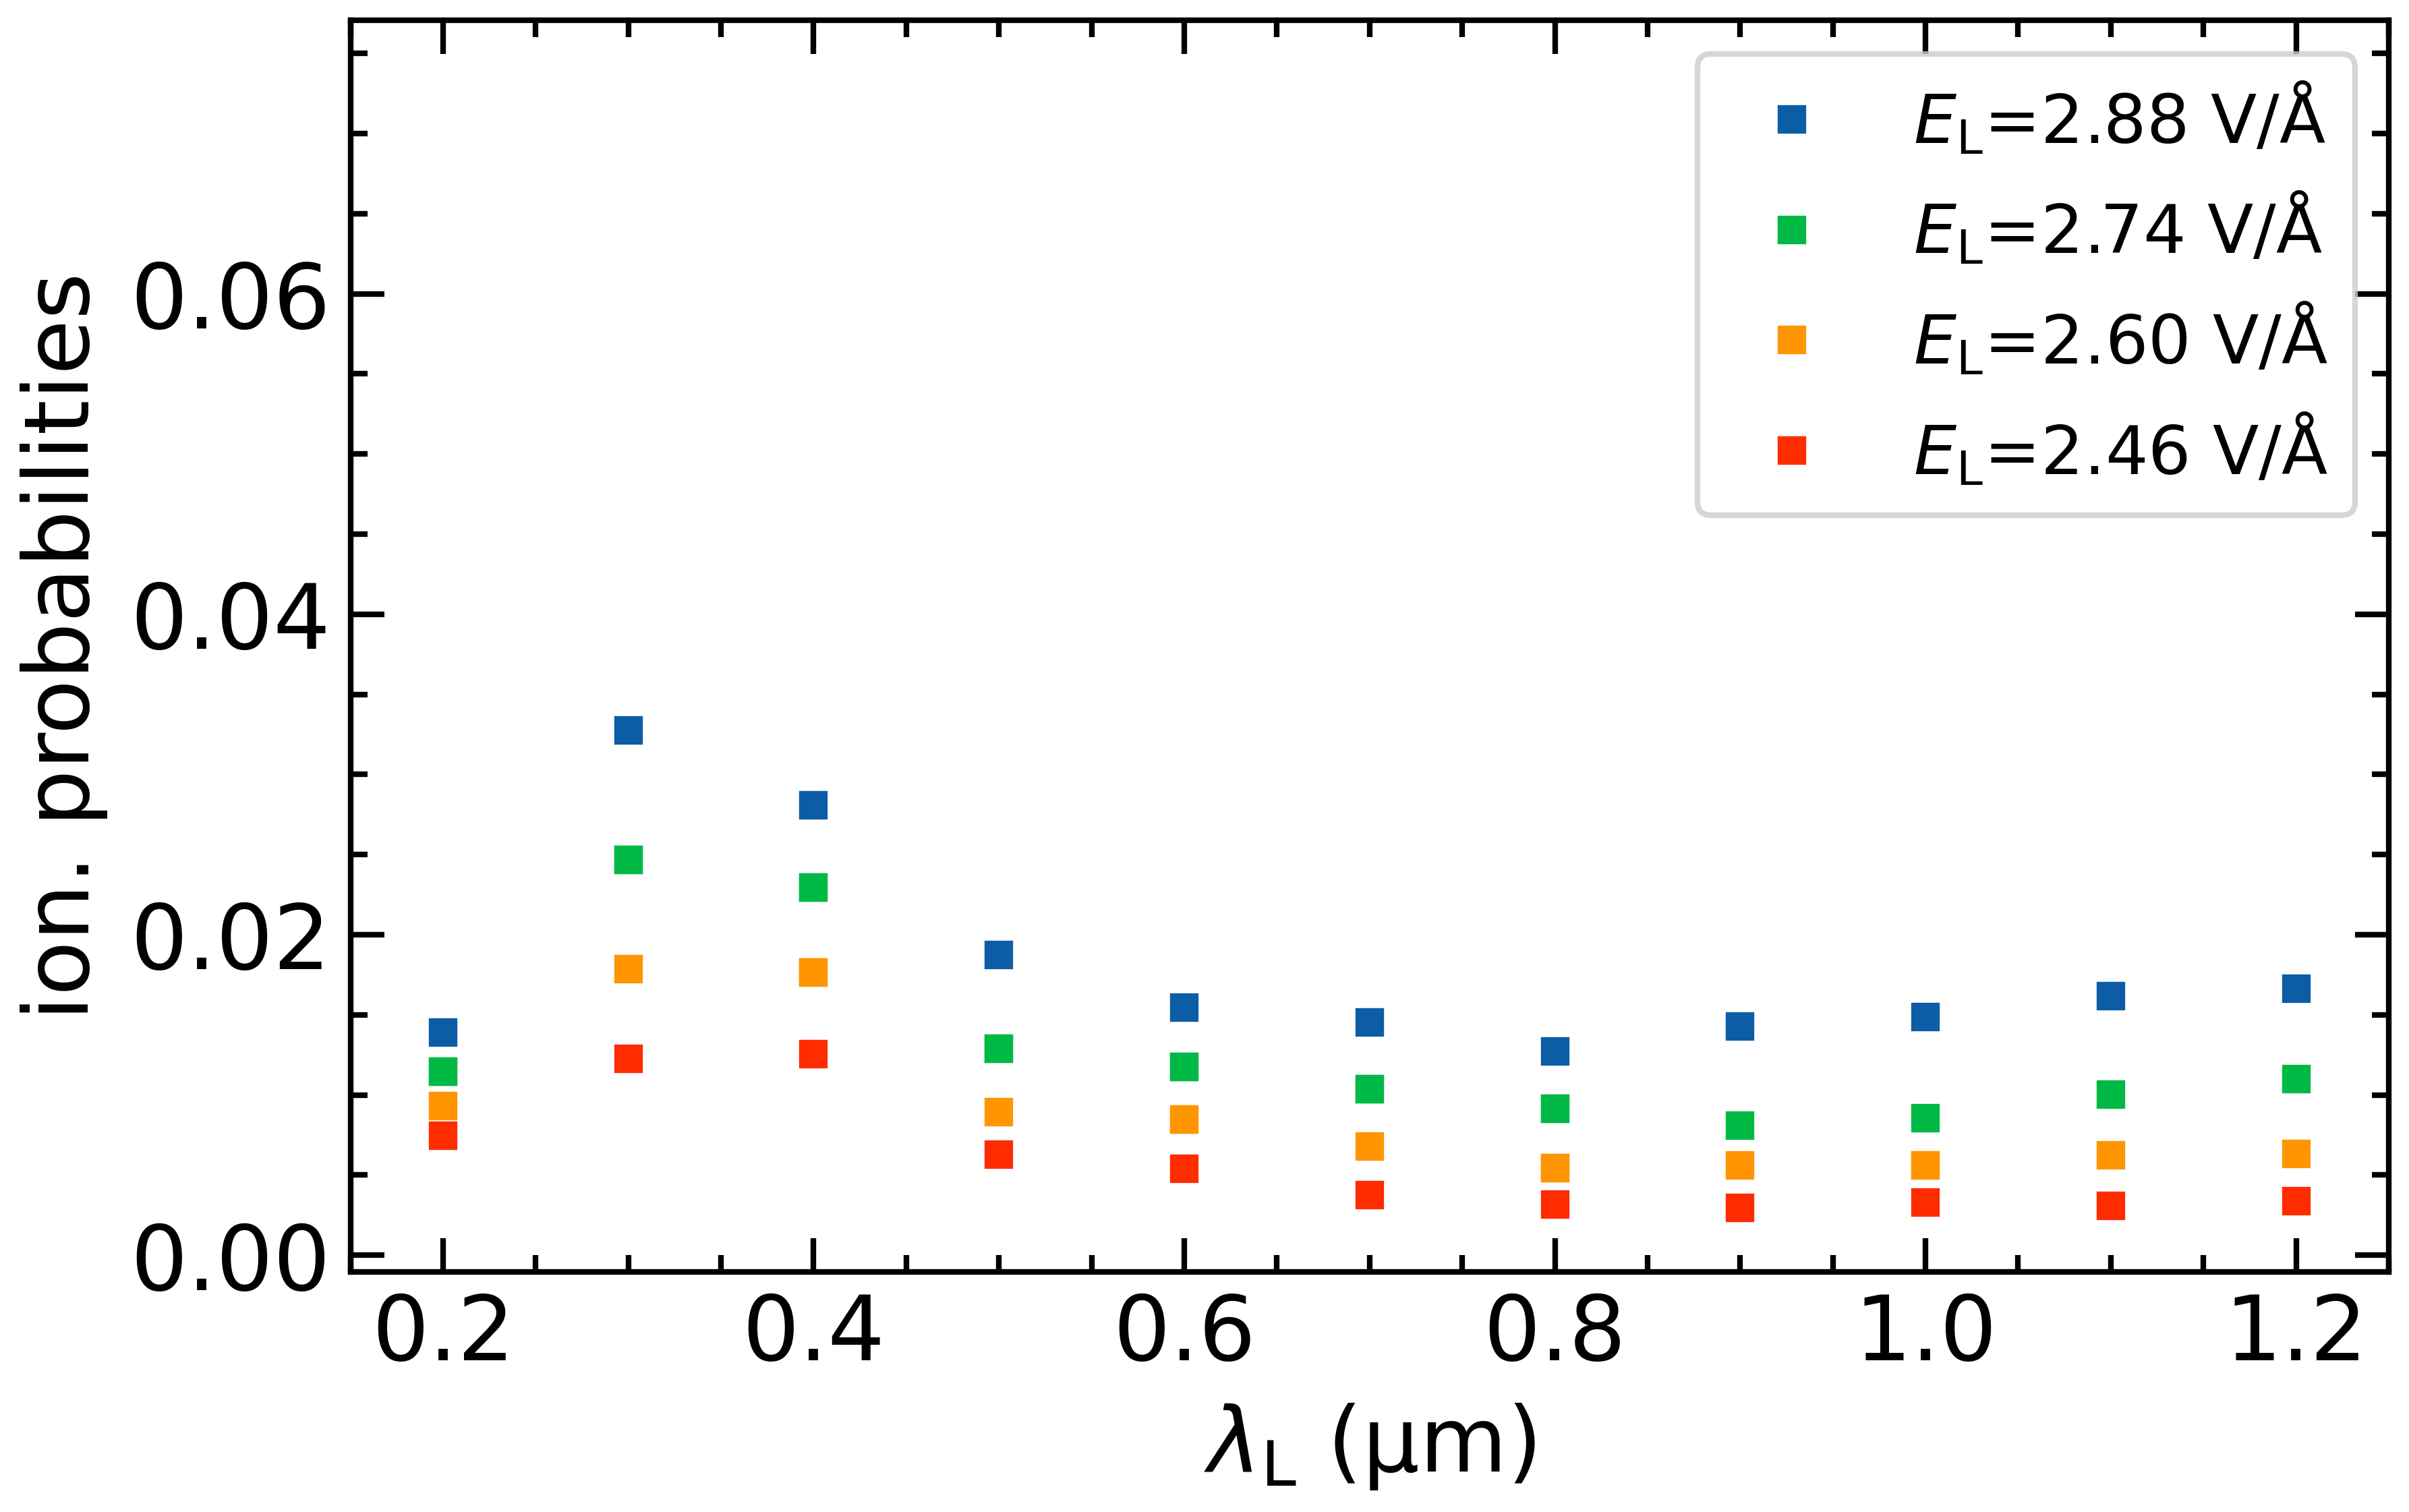

In [36]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from __init__ import AtomicUnits as AU
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy.interpolate import make_interp_spline
from model import create_pulse
from kernels import IonRate, QSRate


def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    
    # data = data[data.wavel>=300]
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%50==0]
    #color="black"
    # ax.plot(data.wavel/1000, data.Y, '.', color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 's', color=color, markersize=4, label=f'{label_prefix}')
    
    
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    #a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), '-', color=color, alpha=0)#, label=label_prefix)#rf'$I = {a:.0f}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')
    if color=="C0":
        print(0.8, X_Y_Spline(800))


# Generate the plot
fig, axs = plt.subplots(1, 1, sharey=False, figsize=set_size(469.755, fraction=1, subplots=(1, 1)))
# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1.1e14, 'C0'),  (1e14, 'C1'), (0.9e14, 'C2'), (0.8e14, 'C3')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs, data, color, r'$E_\mathrm{L}$='+f"{np.sqrt(intensity/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", params=tRecX_params) #sci_notation_base_power(intensity)

    
axs.legend(fancybox=True, frameon=True, fontsize='large')
axs.set_xlabel(r"$\lambda_\mathrm{L}$ ($\mathrm{\mu}$m)")
axs.set_ylabel("ion. probabilities")
plt.savefig("attoworld_seminar/H_fit_points.pdf", format="pdf", bbox_inches="tight")
plt.show()


0.8 0.015478587860988767


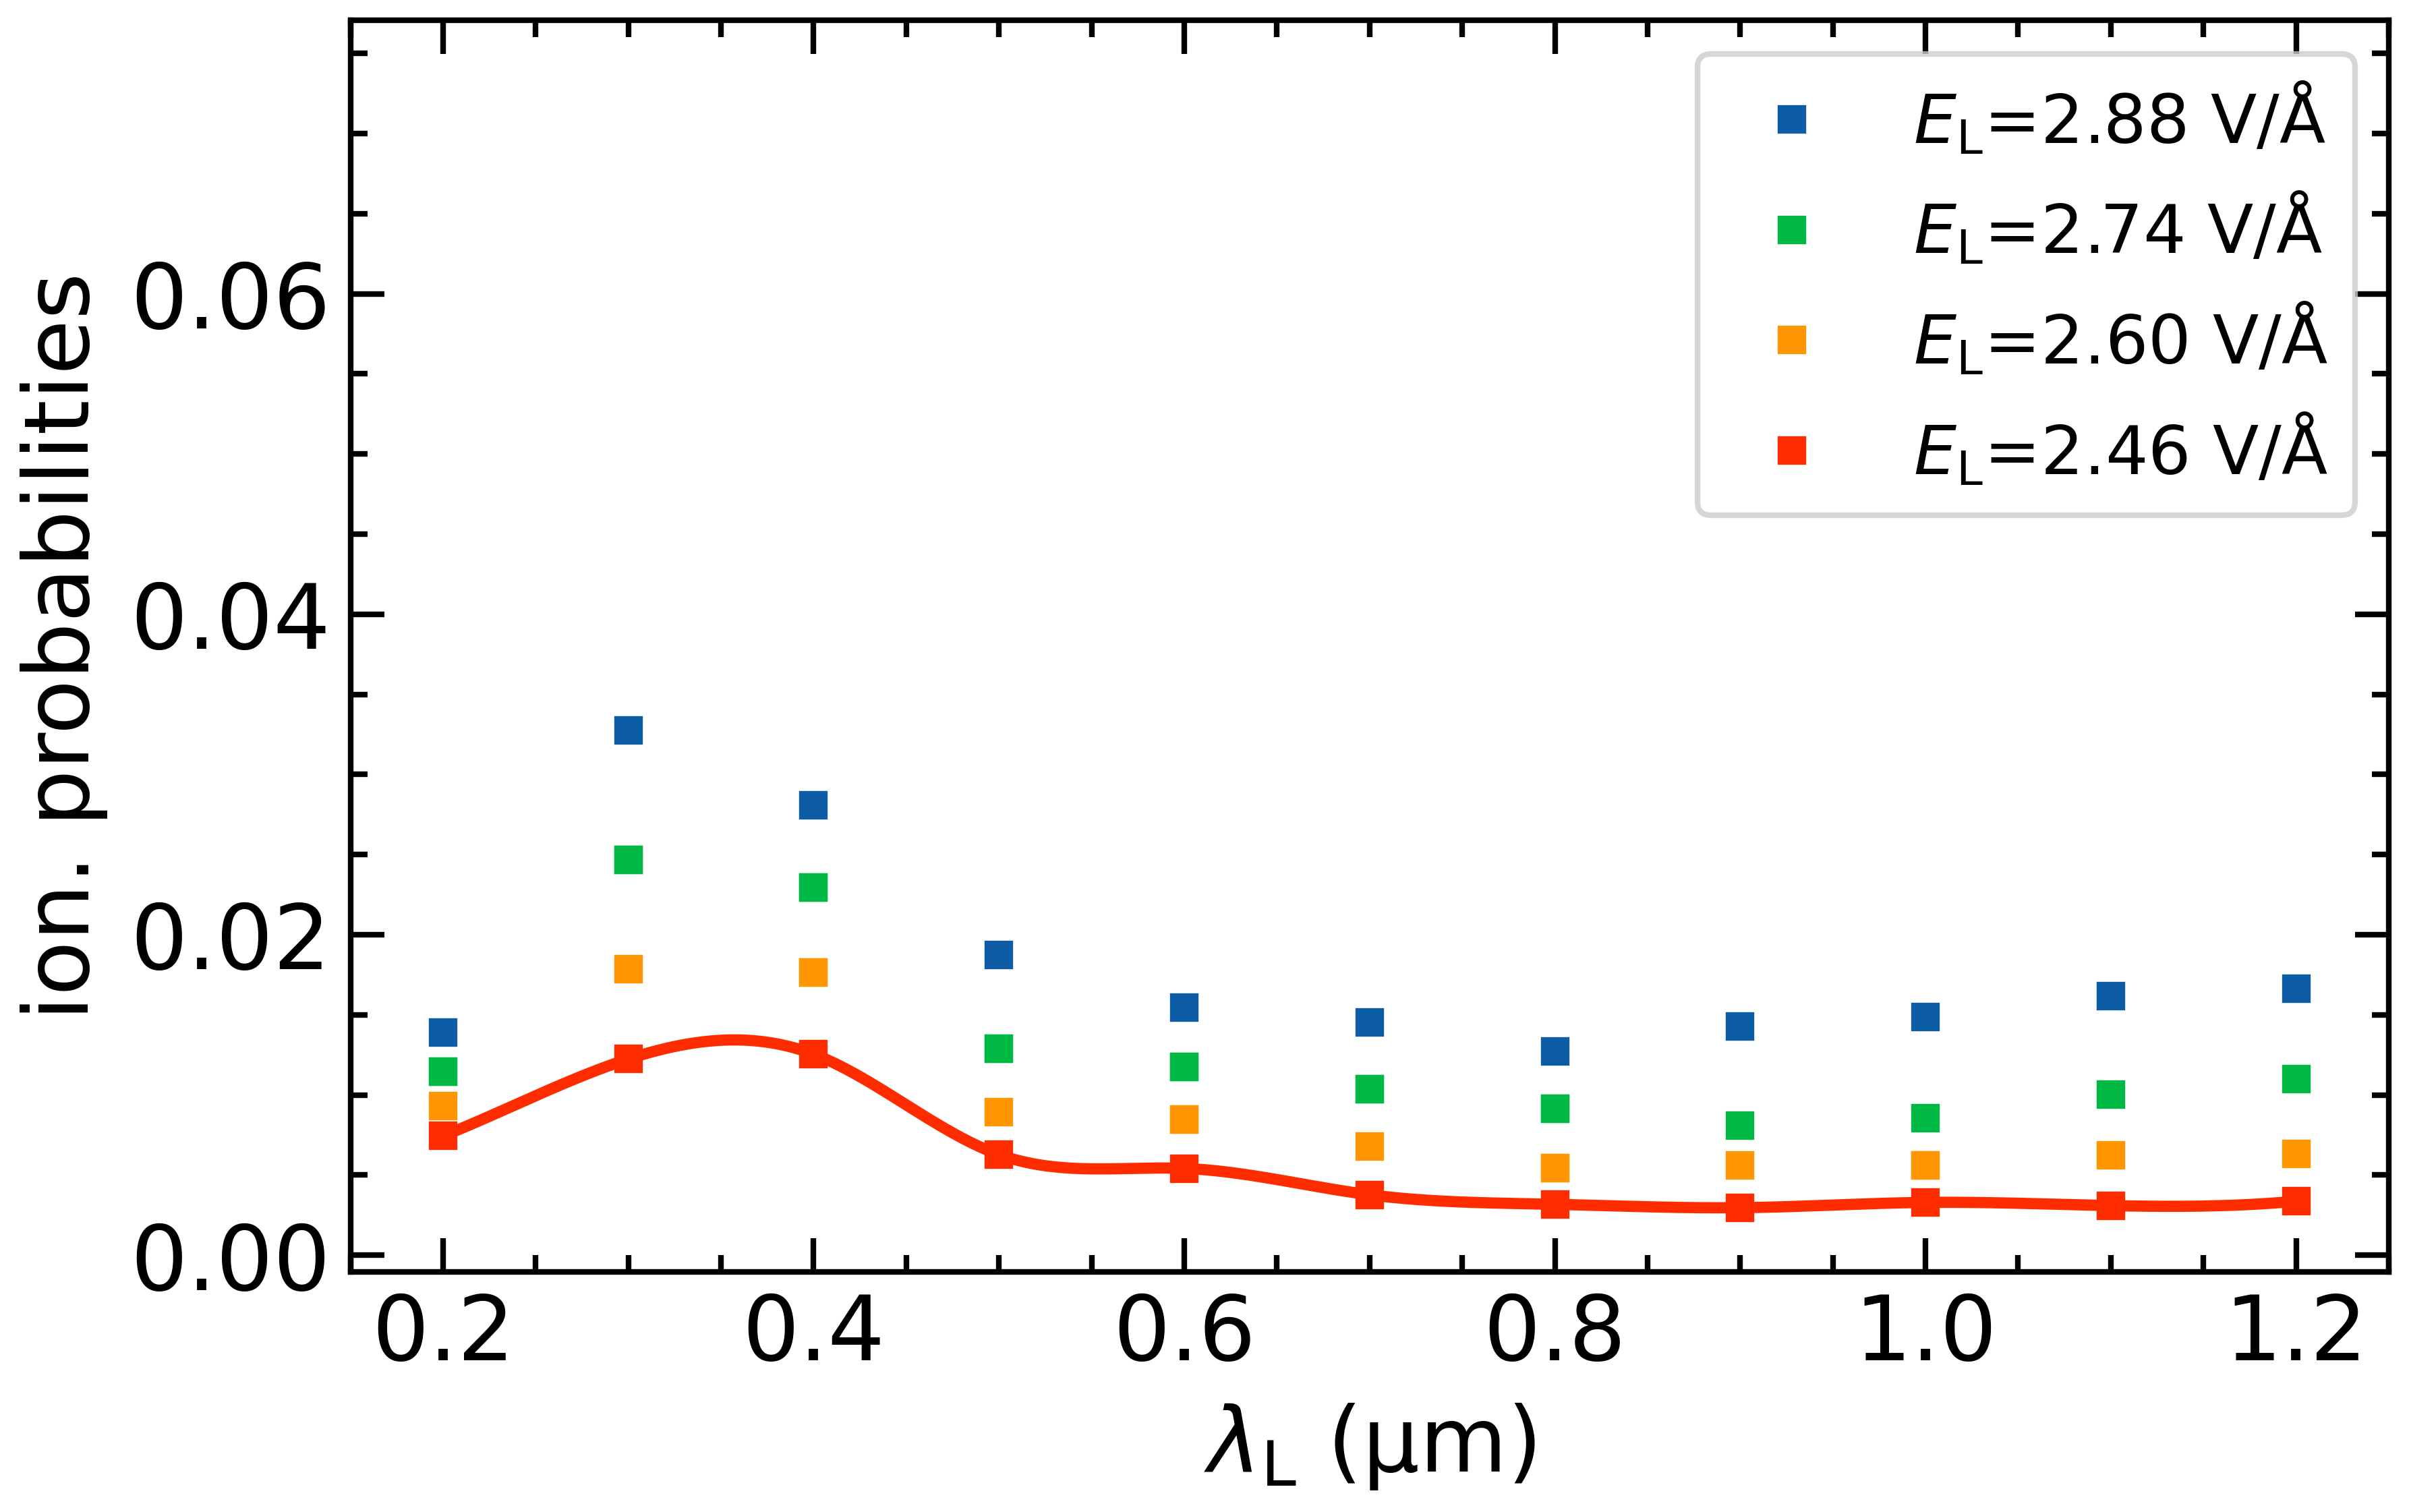

In [37]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from __init__ import AtomicUnits as AU
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy.interpolate import make_interp_spline
from model import create_pulse
from kernels import IonRate, QSRate


def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    
    # data = data[data.wavel>=300]
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%50==0]
    #color="black"
    # ax.plot(data.wavel/1000, data.Y, '.', color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 's', color=color, markersize=4, label=f'{label_prefix}')
    if color=='C3':
        trial_spline=make_interp_spline(used_for_fit.wavel, used_for_fit.Y)
        x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
        ax.plot(x/1000, trial_spline(x),color=color)
    
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    #a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), '-', color=color, alpha=0)#, label=label_prefix)#rf'$I = {a:.0f}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')
    if color=="C0":
        print(0.8, X_Y_Spline(800))


# Generate the plot
fig, axs = plt.subplots(1, 1, sharey=False, figsize=set_size(469.755, fraction=1, subplots=(1, 1)))
# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1.1e14, 'C0'),  (1e14, 'C1'), (0.9e14, 'C2'), (0.8e14, 'C3')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs, data, color, r'$E_\mathrm{L}$='+f"{np.sqrt(intensity/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", params=tRecX_params) #sci_notation_base_power(intensity)

    
axs.legend(fancybox=True, frameon=True, fontsize='large')
axs.set_xlabel(r"$\lambda_\mathrm{L}$ ($\mathrm{\mu}$m)")
axs.set_ylabel("ion. probabilities")
plt.savefig("attoworld_seminar/H_fit_points.pdf", format="pdf", bbox_inches="tight")
plt.show()


0.8 0.015478587860988767


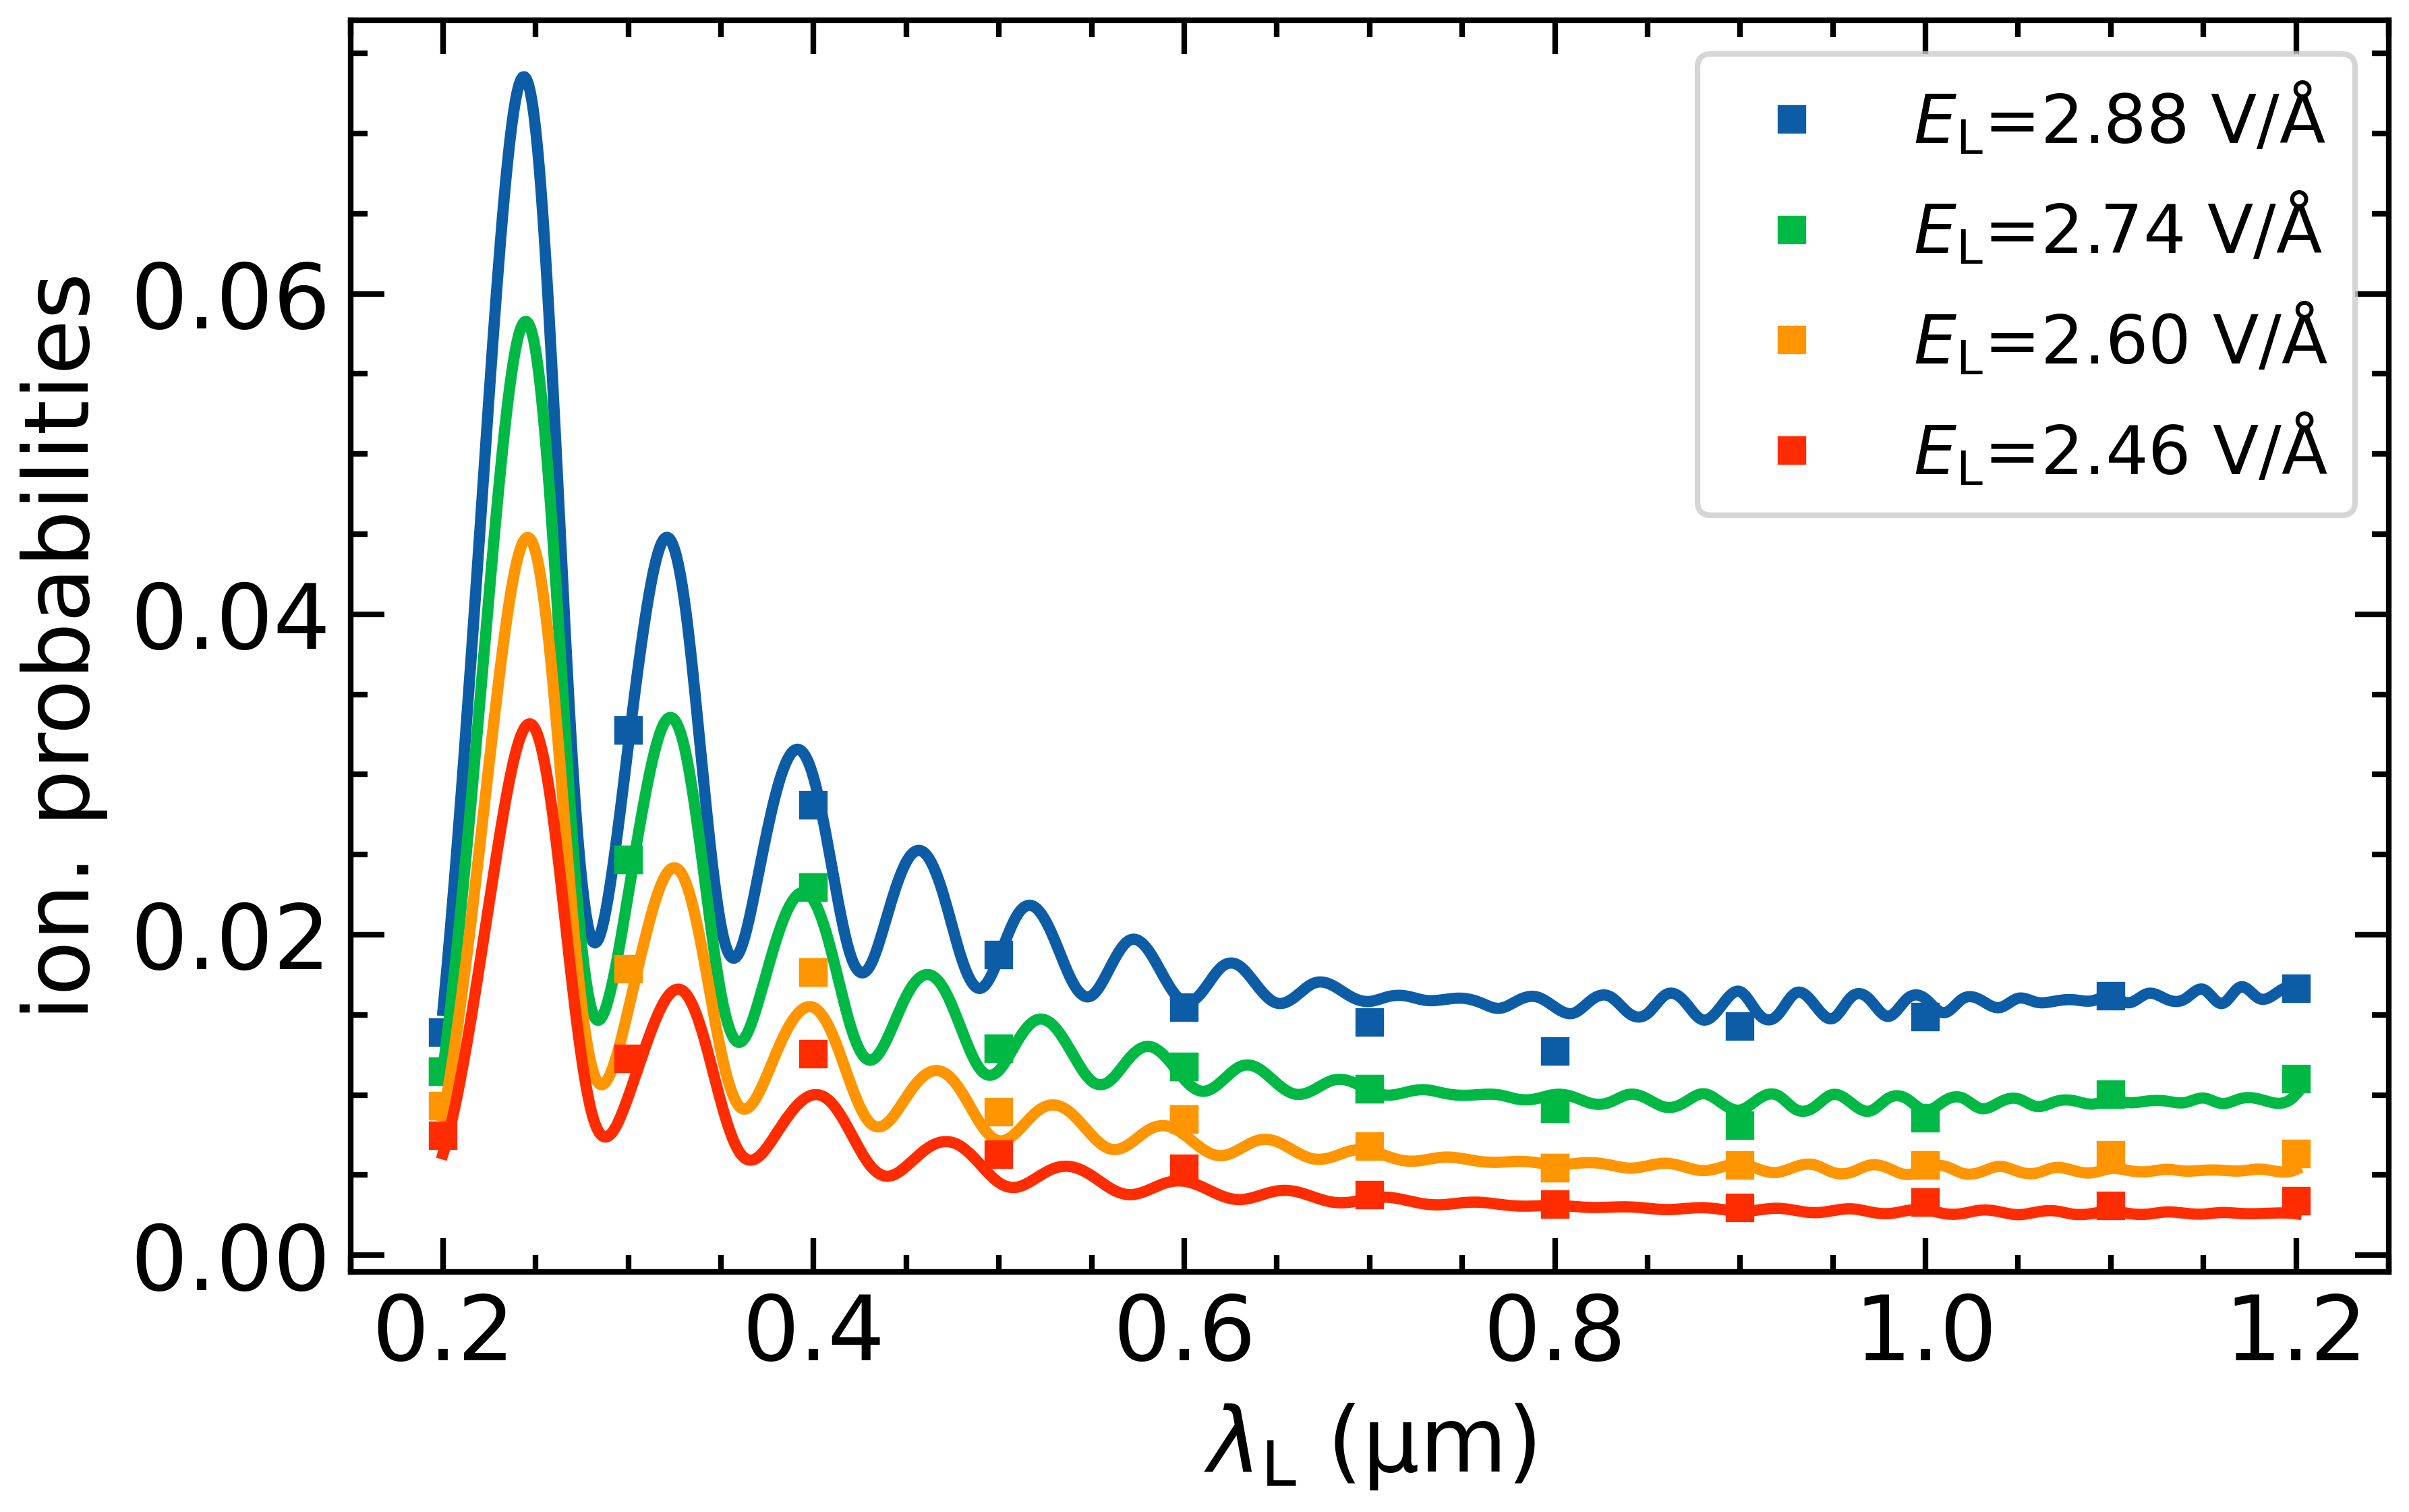

In [38]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from __init__ import AtomicUnits as AU
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy.interpolate import make_interp_spline
from model import create_pulse
from kernels import IonRate, QSRate


def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    
    # data = data[data.wavel>=300]
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%50==0]
    #color="black"
    # ax.plot(data.wavel/1000, data.Y, '.', color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 's', color=color, markersize=4, label=f'{label_prefix}')
    
    
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    #a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), '-', color=color)#, label=label_prefix)#rf'$I = {a:.0f}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')
    if color=="C0":
        print(0.8, X_Y_Spline(800))


# Generate the plot
fig, axs = plt.subplots(1, 1, sharey=False, figsize=set_size(469.755, fraction=1, subplots=(1, 1)))
# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1.1e14, 'C0'),  (1e14, 'C1'), (0.9e14, 'C2'), (0.8e14, 'C3')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs, data, color, r'$E_\mathrm{L}$='+f"{np.sqrt(intensity/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", params=tRecX_params) #sci_notation_base_power(intensity)

    
axs.legend(fancybox=True, frameon=True, fontsize='large')
axs.set_xlabel(r"$\lambda_\mathrm{L}$ ($\mathrm{\mu}$m)")
axs.set_ylabel("ion. probabilities")
plt.savefig("attoworld_seminar/H_GASFIR_pred.pdf", format="pdf", bbox_inches="tight")
plt.show()


0.8 0.015478587860988767


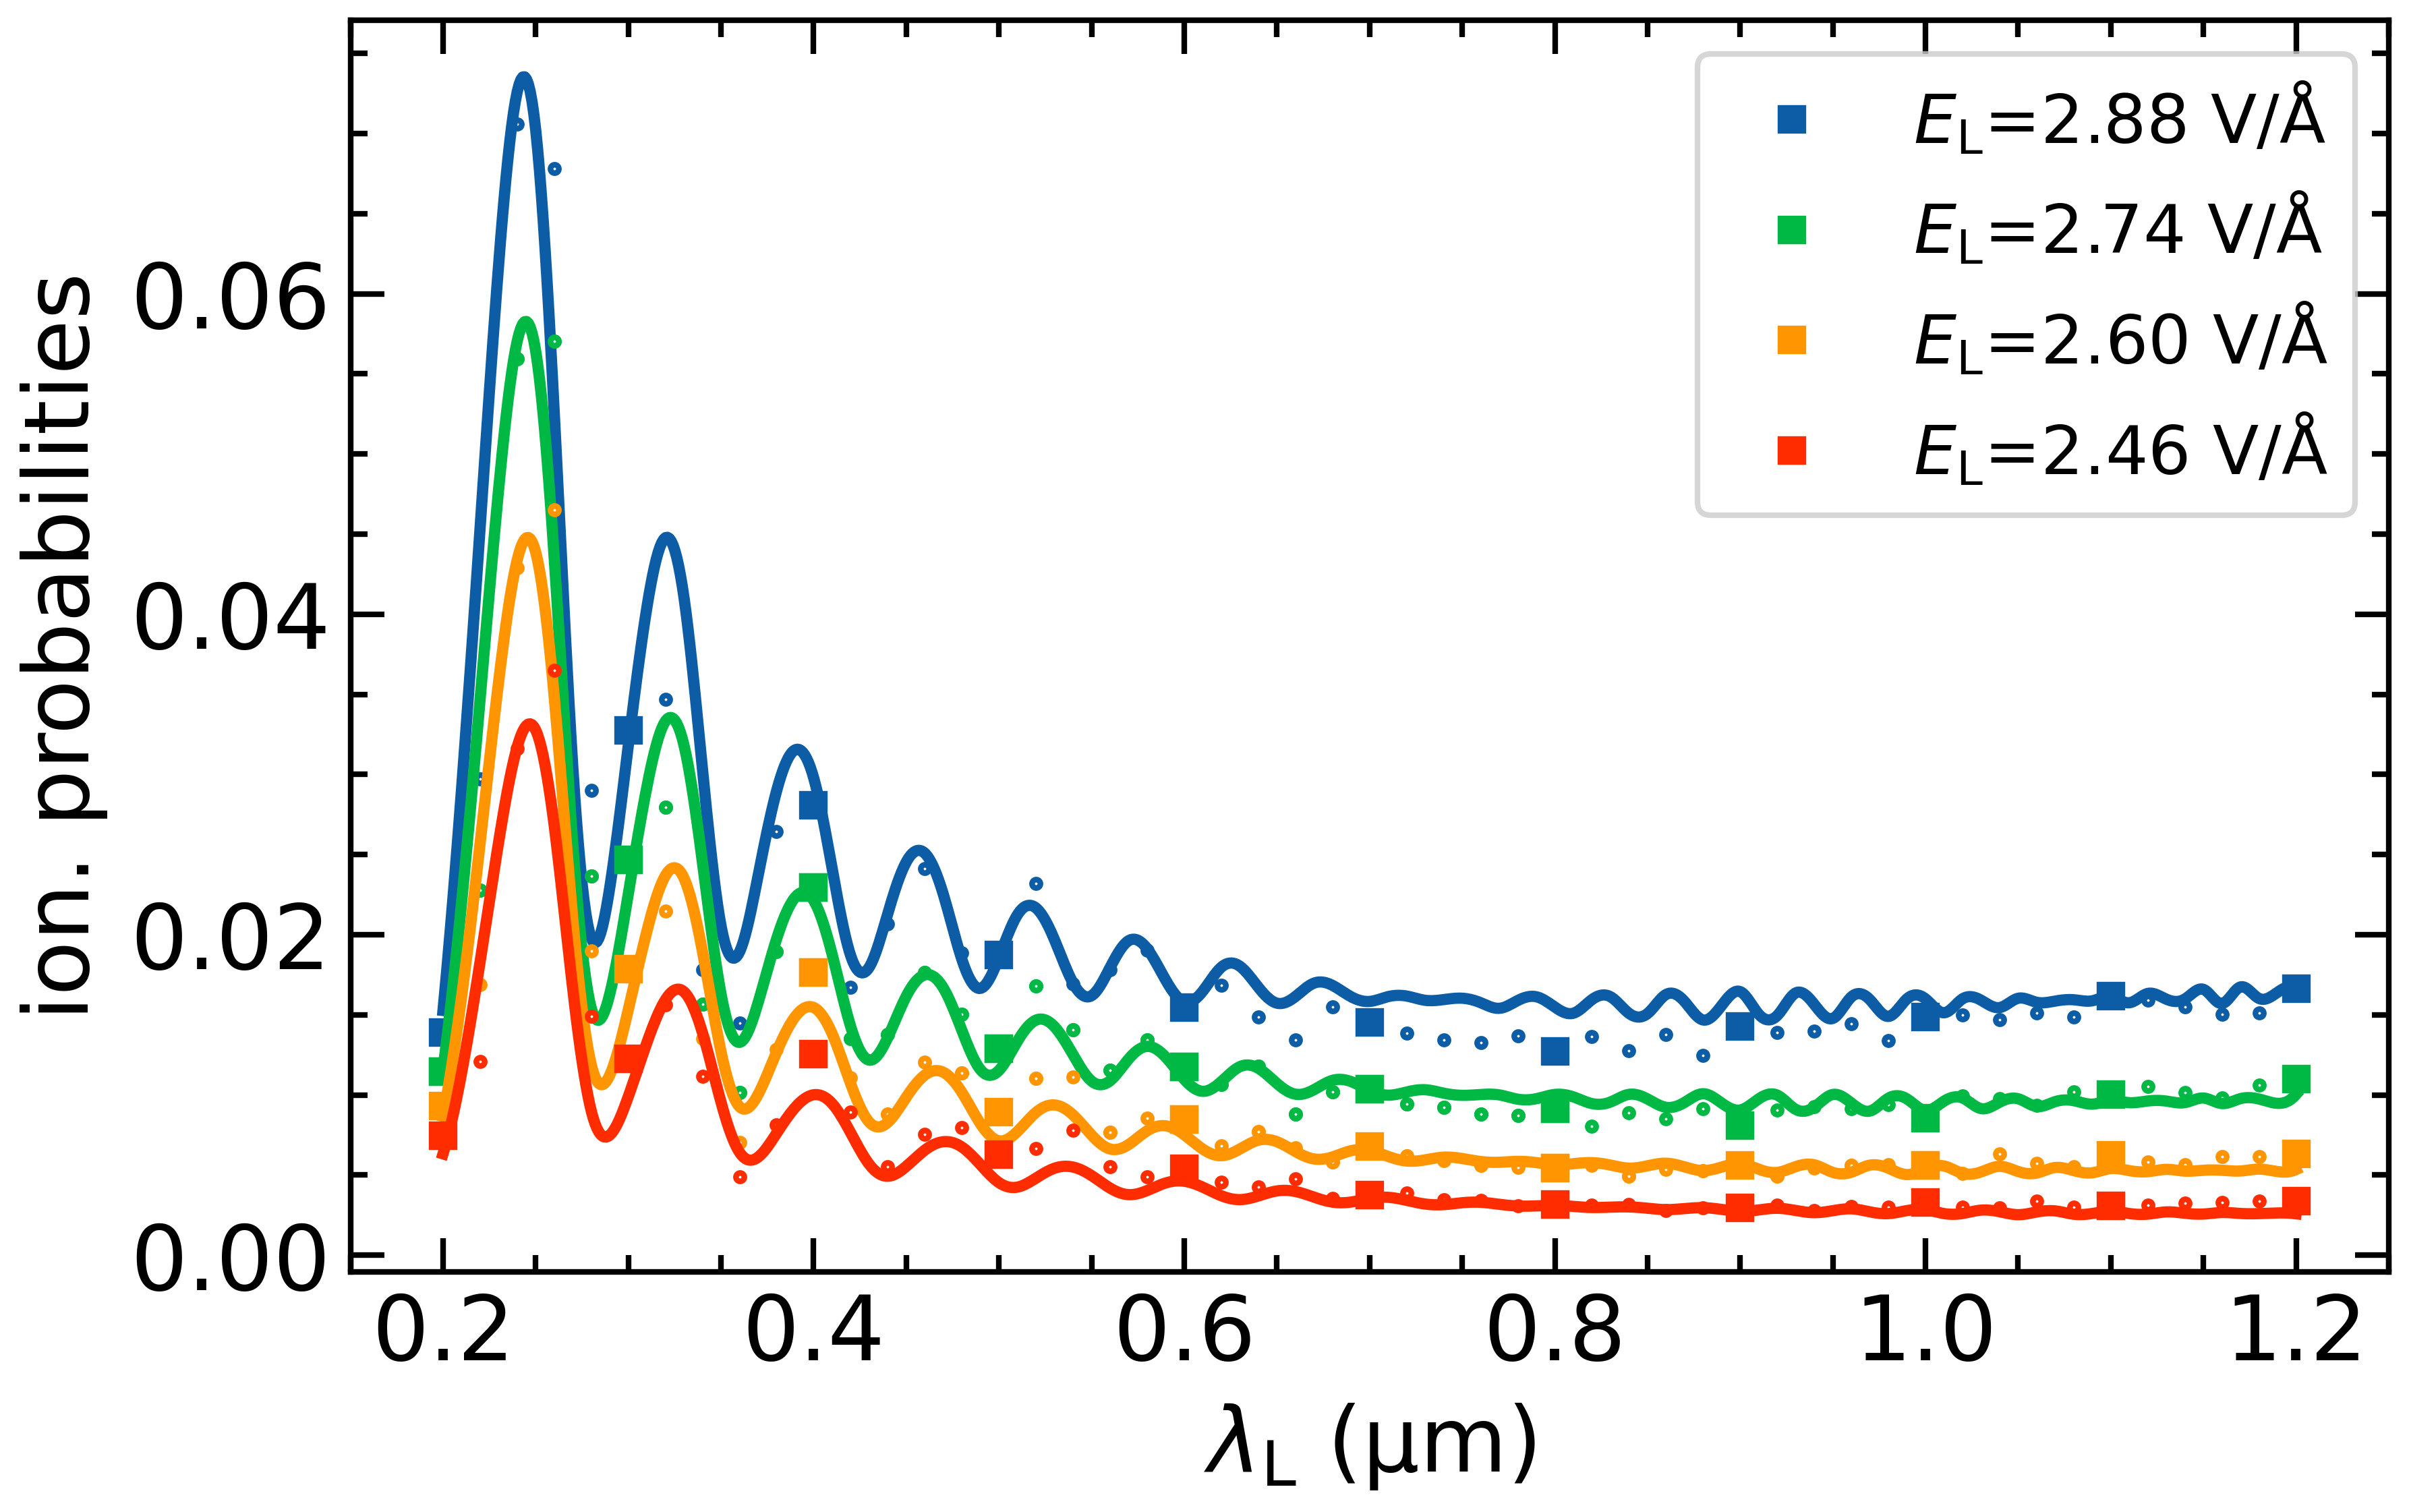

In [39]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from __init__ import AtomicUnits as AU
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy.interpolate import make_interp_spline
from model import create_pulse
from kernels import IonRate, QSRate


def plot_data(ax, data, color, label_prefix, params):
    data = data.sort_values(by='wavel')
    data_fit=pd.DataFrame({'wavel': np.arange(data.wavel.min(), max(data.wavel.max(),1200)+10, 10), 'intens': data.intens.iloc[0], 'FWHM_OC': data.FWHM_OC.iloc[0], 'cep': data.cep.iloc[0]})
    
    # data = data[data.wavel>=300]
    used_for_fit = data[data.Used_for_fit == True]
    data=data[data.Used_for_fit == False]
    data=data[data.wavel%20==0]
    #color="black"
    ax.plot(data.wavel/1000, data.Y, '.', color=color, markerfacecolor='white', markersize=3)#, label=f'{label_prefix} validation data'
    ax.plot(used_for_fit.wavel/1000, used_for_fit.Y, 's', color=color, markersize=4, label=f'{label_prefix}')
    
    
    data_fit["fwhmau"]=data_fit["FWHM_OC"]*data_fit.wavel/299792458/2.418884328*10**8
    data_fit["pulses"] = data_fit.apply(lambda dat: add_pulses(dat), axis=1)
    data_fit["Function_to_fit"]="IonProb"
    X_Y_Spline = make_interp_spline(data_fit.wavel.to_numpy(), model_unified(params, data_fit))
    x=np.linspace(data_fit.wavel.min(), data_fit.wavel.max(), 1000)
    #a,p=label_prefix
    ax.plot(x/1000, X_Y_Spline(x), '-', color=color)#, label=label_prefix)#rf'$I = {a:.0f}\times 10^{{{p}}}\, \mathrm{{W cm^{{-2}}}}$')
    if color=="C0":
        print(0.8, X_Y_Spline(800))


# Generate the plot
fig, axs = plt.subplots(1, 1, sharey=False, figsize=set_size(469.755, fraction=1, subplots=(1, 1)))
# Plot for tRecX_fitted_data with different intensities
tRecX_fitted_data = pd.read_pickle('GASFIR/Data/WithFit/tRecX_P_fit_data.pkl')
for intensity, color in [(1.1e14, 'C0'),  (1e14, 'C1'), (0.9e14, 'C2'), (0.8e14, 'C3')]: #(1.2e14, 'red'),
    data = tRecX_fitted_data[(tRecX_fitted_data.intens == intensity) & (tRecX_fitted_data.FWHM_OC == 2) & (tRecX_fitted_data.cep == 0)].sort_values(by='wavel')
    plot_data(axs, data, color, r'$E_\mathrm{L}$='+f"{np.sqrt(intensity/1e15*0.02849451308)*AU.Volts_per_Angstrom:.2f} "+r"V/$\mathrm{\AA}$", params=tRecX_params) #sci_notation_base_power(intensity)

    
axs.legend(fancybox=True, frameon=True, fontsize='large')
axs.set_xlabel(r"$\lambda_\mathrm{L}$ ($\mathrm{\mu}$m)")
axs.set_ylabel("ion. probabilities")
plt.savefig("attoworld_seminar/H_GASFIR_pred.pdf", format="pdf", bbox_inches="tight")
plt.show()


(-0.0007833430286927654, 0.016316709687250727)

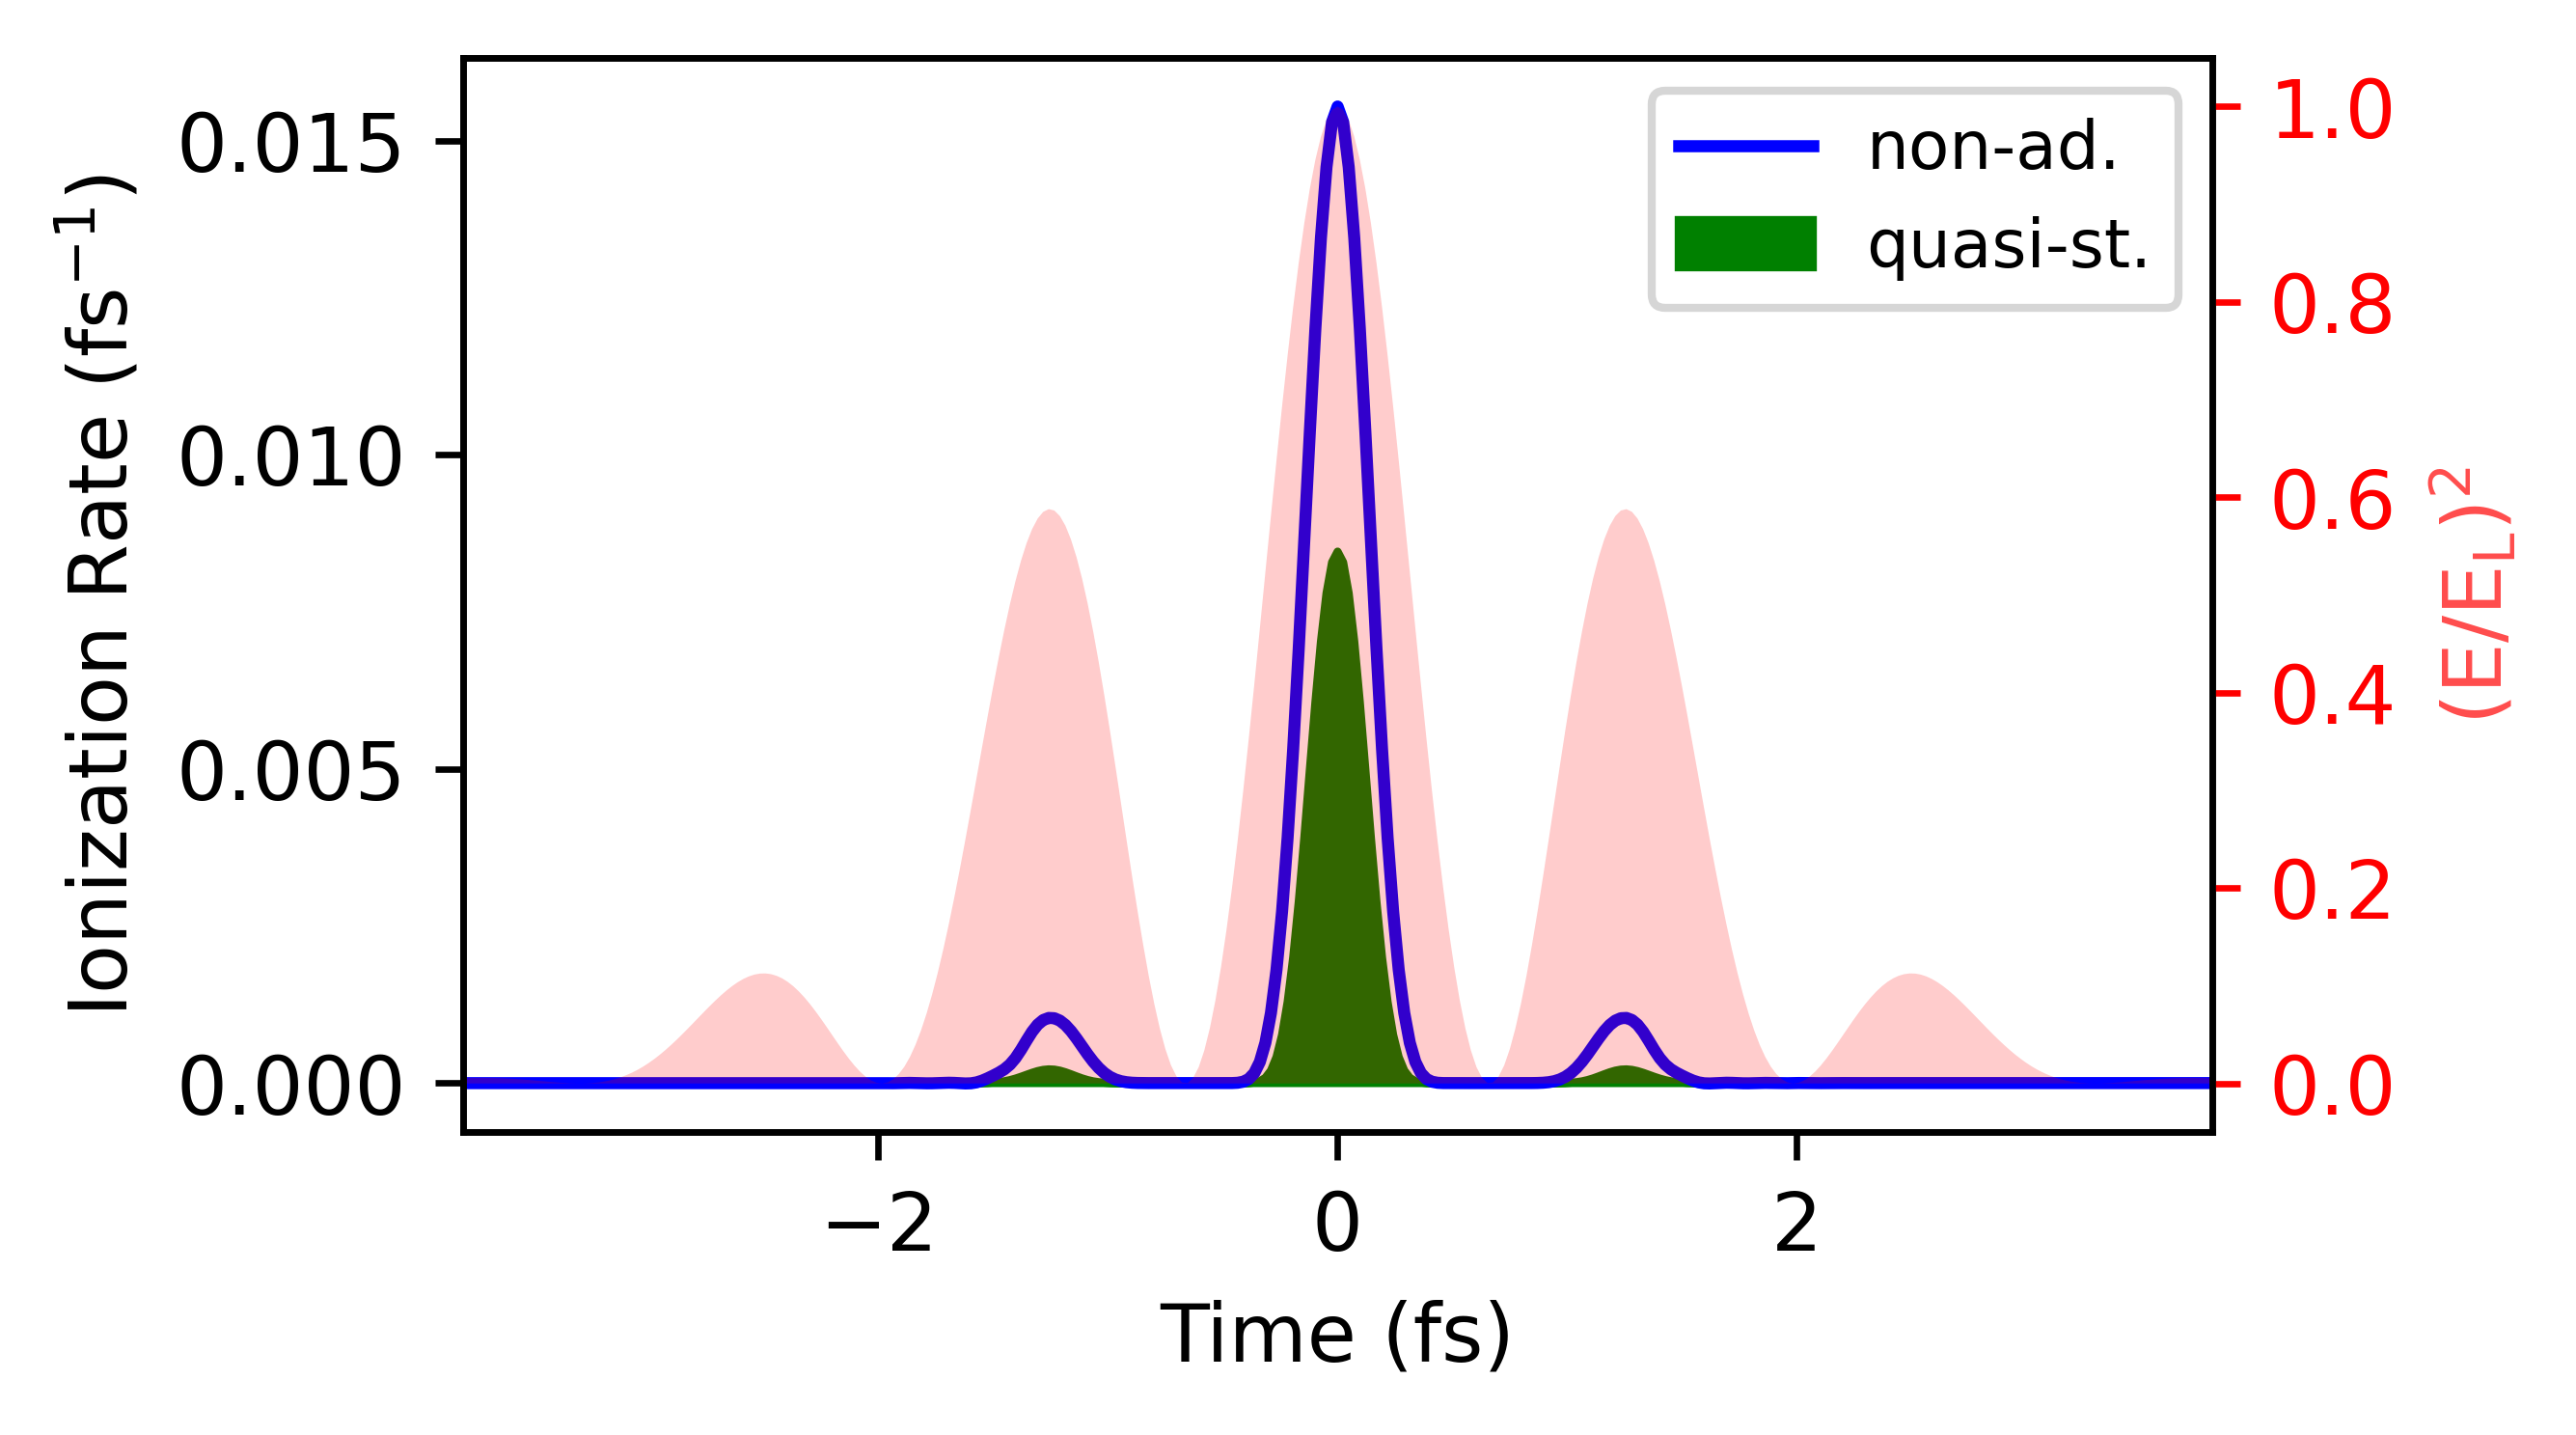

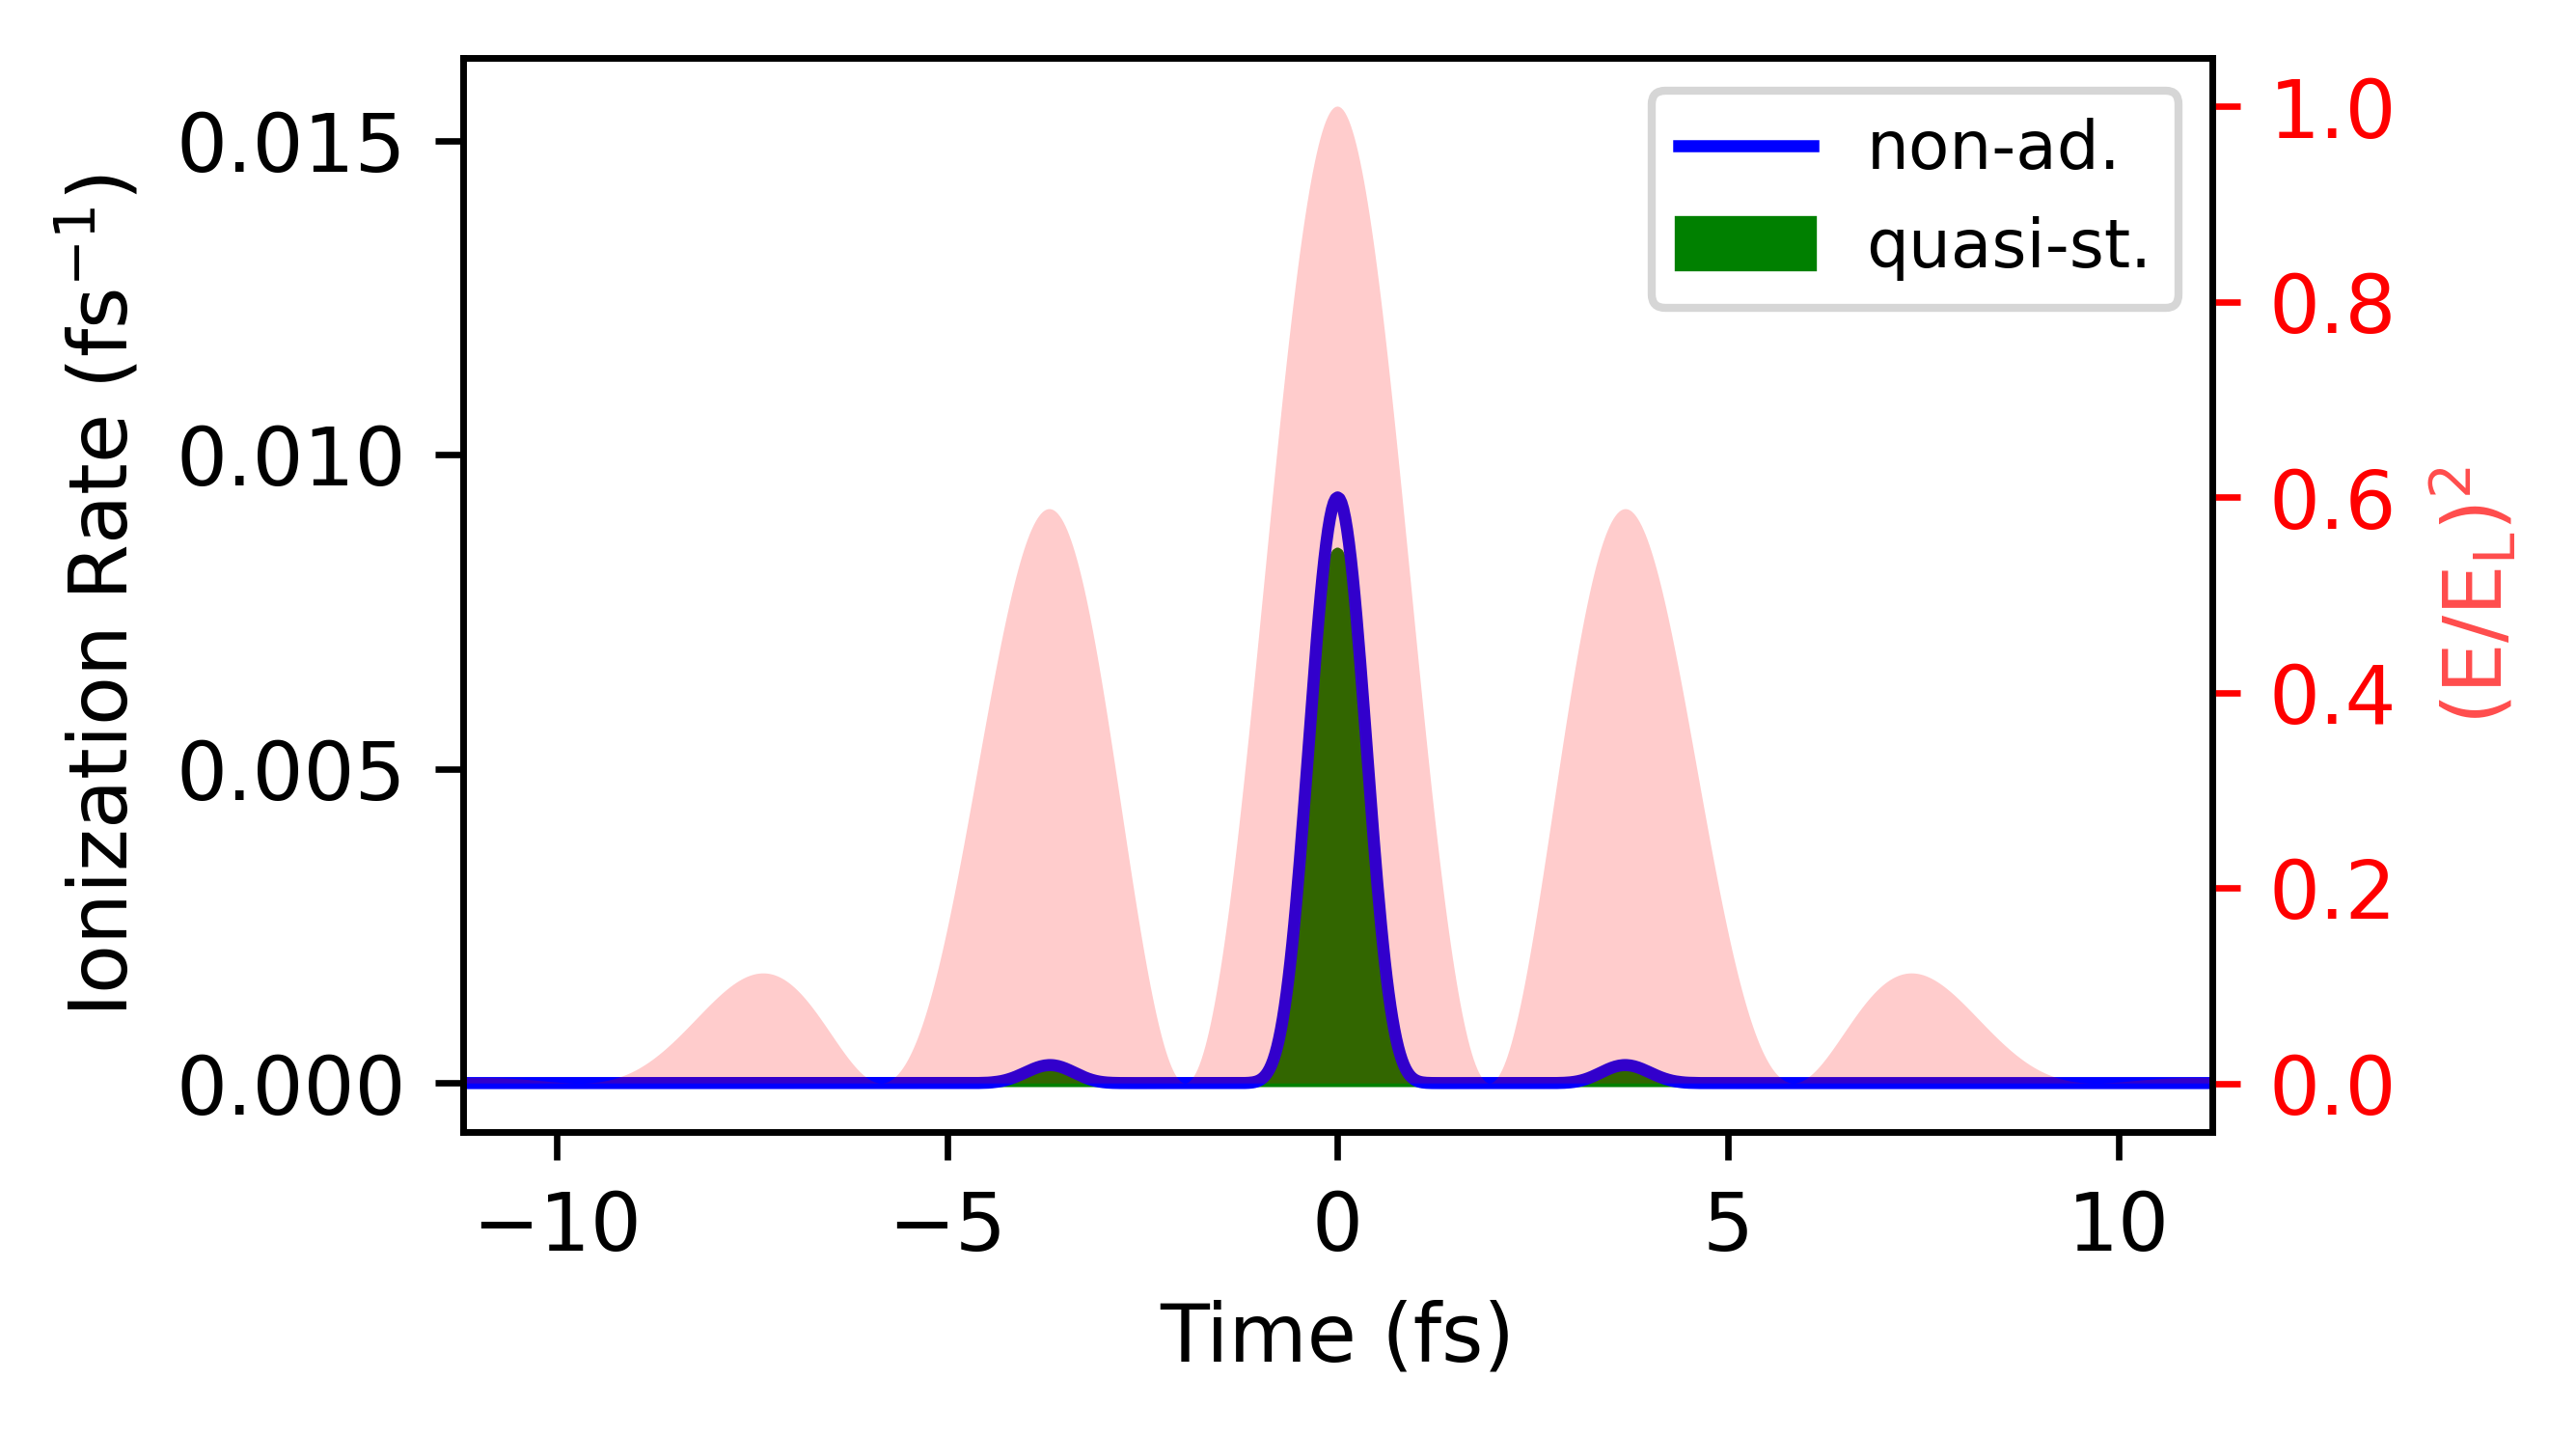

In [7]:
## taker paramters and plot ionition rate for a given pulse with a twin axis showing the field
import matplotlib.pyplot as plt
from model import create_pulse
from kernels import IonRate, QSRate
from __init__ import AtomicUnits as AU


# Generate the plot
fig1, axs1 = plt.subplots(1, 1, sharey=True, figsize=set_size(469.755, fraction=0.6, subplots=(1, 1)))
fig2, axs2 = plt.subplots(1, 1, sharey=True, figsize=set_size(469.755, fraction=0.6, subplots=(1, 1)))
axs=[axs1,axs2]
def plot_ion_rate(ax1, params, pulse, iter):
    # Plot the ionization rate
    t_min, t_max = pulse.get_time_interval()
    time_ar= np.arange(int(t_min), np.ceil(t_max), 1)
    x_values = time_ar*AU.fs
    field_values=pulse.Electric_Field(time_ar)
    nArate = IonRate(time_ar, pulse, param_dict=params.valuesdict(), dT=0.25)
    qsRate = QSRate(field_values, param_dict=params.valuesdict())
    ax1.plot(x_values, nArate/AU.fs, label='non-ad.', color="blue")
    ax1.fill_between(x_values, qsRate/AU.fs, label='quasi-st.', color="green")
    ax1.set_xlabel('Time (fs)')
    ax1.set_xlim(min(x_values)/2, max(x_values)/2)

    # Plot the field
    ax2= ax1.twinx()
    twinYvalues=(field_values/max(abs(field_values)))**2#/0.02849451308*1e15
    # ax2.plot(x_values, field_values, color='red', label='Field', alpha=0.1)
    ax2.fill_between(x_values, twinYvalues, facecolor='red', alpha=0.2)
    # ax2.yaxis.set_tick_params(labelright=True, color='red')
    # ax2.tick_params(axis='y', which='minor', color='red')
    ax2.tick_params(axis='y', which='both', colors='red')
    ax1.set_ylabel('Ionization Rate (fs$^{-1}$)')
    #ax2.set_ylabel(r'intensity ($\mathrm{Wcm^{-2}}$)', color='red', alpha=0.7)
    ax2.set_ylabel(r'$\mathrm{(E/E_L)^2}$', color='red', alpha=0.7)

# Set the legend
iter=0
myPulses = [create_pulse(850, 1e14, 0, 1),create_pulse(2500, 1e14, 0, 1)]
for ax, params, pulse in zip(axs, [tRecX_params, tRecX_params], myPulses):
    plot_ion_rate(ax, params, pulse, iter)
    iter+=1
axs[1].legend(fancybox=True, frameon=True, fontsize='small')
axs[0].legend(fancybox=True, frameon=True, fontsize='small')
axs[1].set_ylim(axs[0].get_ylim())
# plt.subplots_adjust(wspace=0, hspace=0.3)
# # Show the plot
# fig.savefig("GASFIR/images/fig4.eps", format="eps", bbox_inches="tight")
# fig.savefig("GASFIR/images/fig4.pdf", format="pdf", bbox_inches="tight")


